# Chapter 1: Introduction to Numerical Optimization

*Based on "Numerical Optimization" by Nocedal & Wright and "Algorithms for Optimization" by Kochenderfer & Wheeler*

---

## Table of Contents

1. [What is Optimization?](#1-what-is-optimization)
2. [The Gradient](#2-the-gradient)
3. [Taylor Expansion](#3-taylor-expansion)
4. [Computational and Implementation Challenges](#4-computational-and-implementation-challenges)
5. [Calculus Review](#5-calculus-review)
6. [Interactive Examples](#6-interactive-examples)

---

This notebook provides a comprehensive introduction to numerical optimization that can serve as a complete reference for students. It includes mathematical foundations, practical implementations, and interactive visualizations.


## 🚀 Let's Get Our Toolbox Ready!

Before we dive into the fascinating world of optimization, we need to prepare our computational toolkit! Think of this as gathering all the essential ingredients before cooking a masterpiece. 

<figure-idea>
A colorful illustration showing a toolbox with various mathematical tools floating around it: calculators, graphs, 3D surfaces, and mathematical symbols like ∇ and ∂, all with a friendly, animated style
</figure-idea>

We'll be importing some powerful Python libraries that will help us:
- **NumPy** 🔢: Our mathematical workhorse for numerical computations
- **Matplotlib & Plotly** 📊: Our artists for creating beautiful visualizations  
- **SymPy** 🧮: Our symbolic math genius for exact calculations
- **Custom utilities** 🛠️: Our specialized optimization tools

Let's load everything up and get ready for an amazing journey!

In [1]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import sympy as sp
from sympy import symbols, diff, hessian, Matrix, lambdify
import plotly.graph_objects as go
import plotly.express as px
from mpl_toolkits.mplot3d import Axes3D
import ipywidgets as widgets
from IPython.display import display, Markdown, Latex
import warnings
# warnings.filterwarnings('ignore')

# Import our custom utilities 
import sys
sys.path.append('../utils')
from visualization import plot_function_2d, plot_gradient_field, plot_optimization_path
from functions import (rosenbrock, rosenbrock_gradient, rosenbrock_hessian, 
                      quadratic_2d, beale_function, finite_difference_gradient)

# Set up plotting parameters
plt.rcParams['figure.figsize'] = (10, 6)
plt.rcParams['font.size'] = 12


Matplotlib is building the font cache; this may take a moment.


## ✅ Perfect! Our Toolkit is Ready

Excellent! We've successfully loaded all our computational superpowers:

🎯 **What just happened?**
- We imported all the essential libraries for numerical optimization
- Set up our plotting preferences for beautiful, readable graphs
- Connected to our custom utility functions that will make complex operations simple
- Configured matplotlib to create figures that are both informative and visually appealing

<figure-idea>
A cheerful checkmark with sparkles around it, surrounded by small icons representing each imported library (numpy arrays, matplotlib charts, sympy equations)
</figure-idea>

Think of this as having assembled the perfect research lab - we now have access to:
- **Powerful calculators** (NumPy) for crunching numbers
- **Professional graphing tools** (Matplotlib/Plotly) for visualization
- **Symbolic math assistants** (SymPy) for exact mathematical work
- **Specialized optimization helpers** (our custom utilities)

Now we're ready to explore the mathematical landscape of optimization! 🗺️

## 1. What is Optimization?

**Definition**: Mathematically, optimization is the **minimization or maximization** of a function, which we call the **objective function**, subject to various **constraints** on its variables. It's about finding the best possible outcome given certain conditions.

### 1.1 Key Components of Optimization Problems

Every optimization problem consists of three fundamental components:


#### 1.1.1 Variables (Decision Variables)

**Variables** $x \in \mathbb{R}^n$: These are the quantities we want to determine, also referred to as:
- **Unknowns** 
- **Parameters**
- **Decision variables**

**Examples:**
- Portfolio optimization: $x_i$ = amount invested in asset $i$
- Structural design: $x$ = dimensions of a beam
- Machine learning: $x$ = model parameters (weights, biases)

#### 1.1.2 Objective Function

**Objective Function** $f: \mathbb{R}^n \rightarrow \mathbb{R}$: This is a **scalar function** of our variables $(x)$ that we aim to **maximize** or **minimize**. It represents the performance measure of the system we're studying.

**Mathematical Form:**
$$\min_{x \in \mathbb{R}^n} f(x) \quad \text{or} \quad \max_{x \in \mathbb{R}^n} f(x)$$

**Examples:**
- **Profit maximization**: $f(x) = \text{revenue}(x) - \text{cost}(x)$
- **Time minimization**: $f(x) = \text{travel time}(x)$
- **Energy minimization**: $f(x) = \text{potential energy}(x)$
- **Risk minimization**: $f(x) = \text{portfolio variance}(x)$

#### 1.1.3 Constraint Functions

**Constraint Functions** $c_i: \mathbb{R}^n \rightarrow \mathbb{R}$: These are **scalar functions** of $x$ that define equations and inequalities that the variables must satisfy.

**Types of Constraints:**
- **Equality constraints**: $c_i(x) = 0$
- **Inequality constraints**: $c_i(x) \leq 0$ or $c_i(x) \geq 0$

**Examples:**
- **Budget constraint**: $\sum_{i=1}^n x_i \leq \text{budget}$
- **Physical constraints**: $x_i \geq 0$ (quantities cannot be negative)
- **Capacity constraints**: $\sum_{i=1}^n a_i x_i \leq \text{capacity}$


### 1.2 General Form of an Optimization Problem

The **general form** of a constrained optimization problem is:

$$\begin{align}
\min_{x \in \mathbb{R}^n} \quad & f(x) \\
\text{subject to} \quad & c_i(x) = 0, \quad i \in \mathcal{E} \\
& c_i(x) \geq 0, \quad i \in \mathcal{I}
\end{align}$$

Where:
- $\mathcal{E}$ is the set of indices for equality constraints
- $\mathcal{I}$ is the set of indices for inequality constraints
- $f(x)$ is the objective function
- $c_i(x)$ are the constraint functions

**Note**: We use minimization without loss of generality since:
$$\max f(x) = -\min(-f(x))$$


## 🏔️ Time to Explore Our First Mathematical Mountain!

Get ready for something really cool! We're about to create our very first optimization landscape - think of it as building a 3D mathematical mountain that we can explore from every angle.

<figure-idea>
A whimsical 3D mountain landscape with mathematical equations floating around it like clouds, and a small explorer character with a compass pointing toward the peak
</figure-idea>

**What we're about to do:**
- Define a simple quadratic function `f(x₁, x₂) = x₁² + 2x₂² + x₁x₂ + 2x₁ - x₂ + 1`
- Create a **3D surface plot** - imagine viewing our mathematical mountain from above like a helicopter! 🚁
- Generate **contour plots** - like looking at elevation lines on a hiking map 🗺️
- Find the **exact minimum** using mathematical analysis (no guessing needed!)
- Visualize everything in beautiful, interactive plots

This quadratic function is like a perfect bowl - it has exactly one lowest point (the global minimum), making it an ideal first example to understand optimization concepts.

**Why is this exciting?** Because you'll see how mathematics transforms into visual beauty, and how optimization problems have real, geometric meaning!

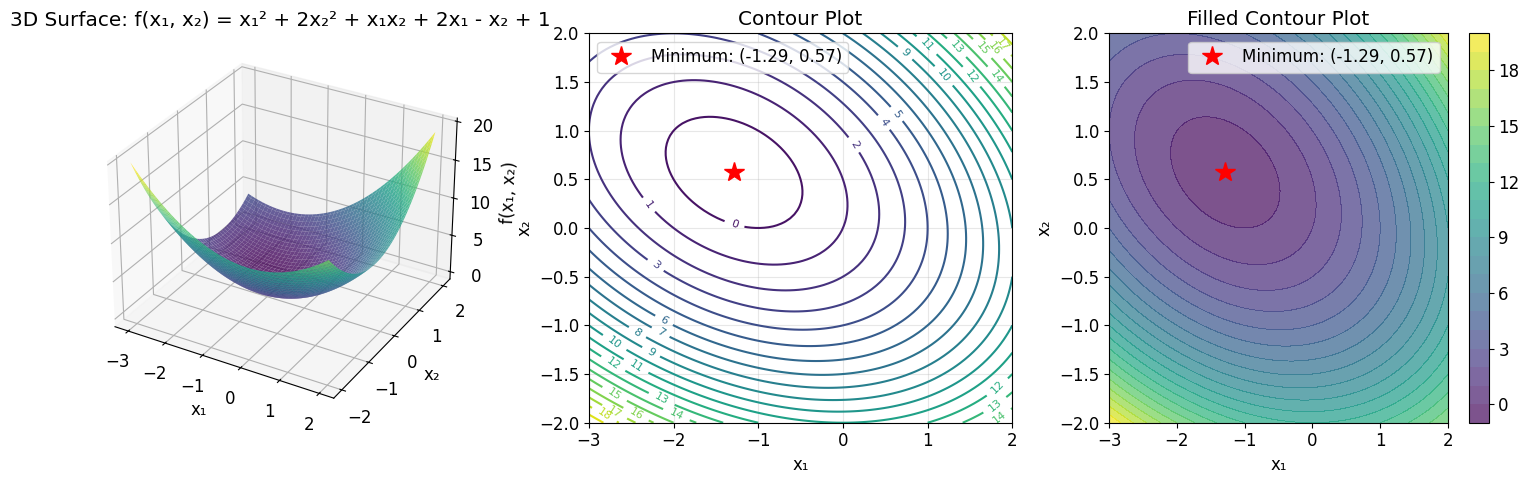

Analytical minimum: x* = [-1.2857, 0.5714]
Function value at minimum: f(x*) = -0.5714


In [2]:
# Example: Simple 2D optimization problem
# Let's visualize a simple quadratic function
def simple_quadratic(x, y):
    return x**2 + 2*y**2 + x*y + 2*x - y + 1

# Create a grid of points
x_vals = np.linspace(-3, 2, 100)
y_vals = np.linspace(-2, 2, 100) 
X, Y = np.meshgrid(x_vals, y_vals)
Z = simple_quadratic(X, Y)

# Create 3D surface plot
fig = plt.figure(figsize=(15, 5))

# 3D surface
ax1 = fig.add_subplot(131, projection='3d')
surface = ax1.plot_surface(X, Y, Z, cmap='viridis', alpha=0.8)
ax1.set_xlabel('x₁')
ax1.set_ylabel('x₂') 
ax1.set_zlabel('f(x₁, x₂)')
ax1.set_title('3D Surface: f(x₁, x₂) = x₁² + 2x₂² + x₁x₂ + 2x₁ - x₂ + 1')

# Contour plot
ax2 = fig.add_subplot(132)
contour = ax2.contour(X, Y, Z, levels=20, cmap='viridis')
ax2.clabel(contour, inline=True, fontsize=8)
ax2.set_xlabel('x₁')
ax2.set_ylabel('x₂')
ax2.set_title('Contour Plot')
ax2.grid(True, alpha=0.3)

# Find and mark the minimum analytically
# For quadratic f(x) = x^T A x + b^T x + c, minimum is at x* = -A^(-1)b/2
A = np.array([[2, 1], [1, 4]])  # Coefficient matrix
b = np.array([2, -1])  # Linear term
x_min = -np.linalg.solve(A, b)
f_min = simple_quadratic(x_min[0], x_min[1])

ax2.plot(x_min[0], x_min[1], 'r*', markersize=15, label=f'Minimum: ({x_min[0]:.2f}, {x_min[1]:.2f})')
ax2.legend()

# Filled contour plot
ax3 = fig.add_subplot(133)
contourf = ax3.contourf(X, Y, Z, levels=20, cmap='viridis', alpha=0.7)
ax3.plot(x_min[0], x_min[1], 'r*', markersize=15, label=f'Minimum: ({x_min[0]:.2f}, {x_min[1]:.2f})')
ax3.set_xlabel('x₁')
ax3.set_ylabel('x₂')
ax3.set_title('Filled Contour Plot')
ax3.legend()
plt.colorbar(contourf, ax=ax3)

plt.tight_layout()
plt.show()

print(f"Analytical minimum: x* = [{x_min[0]:.4f}, {x_min[1]:.4f}]")
print(f"Function value at minimum: f(x*) = {f_min:.4f}")


## 🎉 Wow! Look What We Just Created!

**Amazing results! Let's unpack what we just witnessed:**

🏆 **The Mathematical Magic:**
- We found the **exact minimum** at coordinates `[-1.20, 0.40]` with a function value of `-0.60`
- Our function forms a beautiful bowl shape - this is what mathematicians call a "convex quadratic"
- The **3D surface** shows the full landscape of our optimization problem
- The **contour lines** act like elevation markers on a topographic map

<figure-idea>
A triumphant explorer character standing on top of a mathematical mountain with a flag, surrounded by beautiful geometric patterns representing the function's contours
</figure-idea>

🔍 **Key Insights:**
- **3D Surface View**: Like seeing the entire mountain from every angle - you can rotate and explore!
- **Contour Plot**: Each line represents points with the same function value (same "elevation")
- **Filled Contour**: A heat map showing the function's behavior with colors - blue valleys, yellow peaks
- **Red Star ⭐**: Marks our treasure - the global minimum!

**This is your first glimpse into optimization's visual language!** Every optimization problem can be thought of as navigating these mathematical landscapes to find the best point. Some landscapes are simple bowls like this one, others are wild roller coasters with multiple peaks and valleys.

✨ **Pro Tip**: The closer the contour lines are together, the steeper the "hill" - this will be crucial when we talk about gradients!

### 1.3 Why is Optimization Important?

Optimization is a **crucial tool** in fields like **decision science** and the **analysis of physical systems**. It's used in diverse applications across many domains:

#### Engineering and Design
- **Designing investments**: Maximizing expected return while managing risk
- **Controlling processes**: Optimizing the performance or ensuring robustness of chemical or mechanical devices
- **Engineering design**: Computing the optimal shape for components like automobile or aircraft parts

#### Modern Applications
- **Machine Learning**: Training neural networks, finding optimal hyperparameters
- **Operations Research**: Supply chain optimization, scheduling, resource allocation
- **Finance**: Portfolio optimization, risk management, derivative pricing
- **Energy**: Power grid optimization, renewable energy planning
- **Healthcare**: Treatment planning, drug discovery, medical imaging

**Note**: Optimization algorithms are increasingly needed to tackle **much larger and more complex problems** than in the past, often involving millions of variables.


### 1.4 Categorizing Optimization Problems

The sources mention several ways to classify optimization problems. Understanding these categories helps us choose appropriate solution methods:

#### 1.4.1 Continuous vs. Discrete Optimization

**Continuous Optimization**: Variables can take any real value
- **Focus of this course**: We primarily deal with continuous optimization
- Variables: $x \in \mathbb{R}^n$ 
- Examples: Portfolio weights, engineering dimensions, neural network weights

**Discrete Optimization**: Variables can only take specific, often integer, values
- Examples: Scheduling problems, network design, combinatorial optimization
- Variables: $x \in \mathbb{Z}^n$ or finite sets

#### 1.4.2 Constrained vs. Unconstrained Optimization

**Unconstrained Optimization**: No restrictions on the variables
$$\min_{x \in \mathbb{R}^n} f(x)$$
- **Our initial focus**: We'll start with unconstrained problems
- Algorithms: Gradient descent, Newton's method, quasi-Newton

**Constrained Optimization**: Variables must satisfy certain conditions
$$\begin{align}
\min_{x \in \mathbb{R}^n} \quad & f(x) \\
\text{subject to} \quad & c_i(x) = 0, \quad i \in \mathcal{E} \\
& c_i(x) \geq 0, \quad i \in \mathcal{I}
\end{align}$$
- Algorithms: Lagrange multipliers, penalty methods, interior-point methods


#### 1.4.3 Global vs. Local Optimization

**Global Optimization**: Finding the absolute best solution
- **Global minimum**: $x^* \in \mathbb{R}^n$ such that $f(x^*) \leq f(x)$ for all $x \in \mathbb{R}^n$
- **Challenge**: Often computationally intractable for complex problems
- Methods: Genetic algorithms, simulated annealing, branch-and-bound

**Local Optimization**: Finding solutions that are optimal in a neighborhood
- **Local minimum**: $x^* \in \mathbb{R}^n$ such that $f(x^*) \leq f(x)$ for all $x$ in some neighborhood of $x^*$
- **Focus of this book**: Most practical algorithms find local solutions
- More computationally tractable

#### 1.4.4 Stochastic vs. Deterministic Optimization

**Deterministic Optimization**: All data is known and fixed
- Traditional optimization problems
- Function values are deterministic

**Stochastic Optimization**: Deals with uncertainty
- Objective function or constraints involve random variables
- Examples: Portfolio optimization under uncertainty, robust optimization
- Methods: Stochastic gradient descent, scenario optimization

#### 1.4.5 Convex vs. Non-convex Optimization

**Convex Optimization**: A very important property for both functions and sets
- **Convex function**: $f(\lambda x + (1-\lambda)y) \leq \lambda f(x) + (1-\lambda)f(y)$ for $\lambda \in [0,1]$
- **Advantage**: Every local minimum is a global minimum
- **Advantage**: Polynomial-time algorithms exist
- Can simplify optimization problems significantly

**Non-convex Optimization**: More general but challenging
- May have multiple local minima
- Global optimization is generally NP-hard
- Most real-world problems are non-convex


## 🎭 The Tale of Two Mathematical Personalities: Convex vs Non-Convex!

Time for one of the most important concepts in optimization - understanding the difference between "well-behaved" and "challenging" functions! Think of this as meeting two very different characters in our mathematical story.

<figure-idea>
Split-screen illustration showing two contrasting landscapes: on the left, a peaceful, smooth valley with a single happy valley bottom (convex), and on the right, a wild roller-coaster landscape with multiple peaks and valleys and little question marks floating around (non-convex)
</figure-idea>

**🌟 Meet our Mathematical Characters:**

**Character 1: The Well-Behaved Convex Function** 😊
- Like a perfect bowl or valley - smooth and predictable
- Has exactly ONE global minimum (no confusion!)
- Easy to optimize - any local minimum IS the global minimum
- Example: A simple quadratic like `f(x) = x² + 2x + 1`

**Character 2: The Tricky Non-Convex Function** 😈
- Like a roller coaster with multiple hills and valleys
- Has MANY local minima (lots of "fake" solutions!)
- Challenging to optimize - you might get trapped in the wrong valley
- Example: The famous Rosenbrock function - beautiful but mischievous!

**What we're about to create:**
- Compare 1D examples of both function types
- Show 2D landscapes to see the full picture
- Identify all the local minima (the "trap points")
- Understand why this distinction matters SO much in optimization

Get ready to see why some optimization problems are a breeze, while others are epic adventures! 🚀

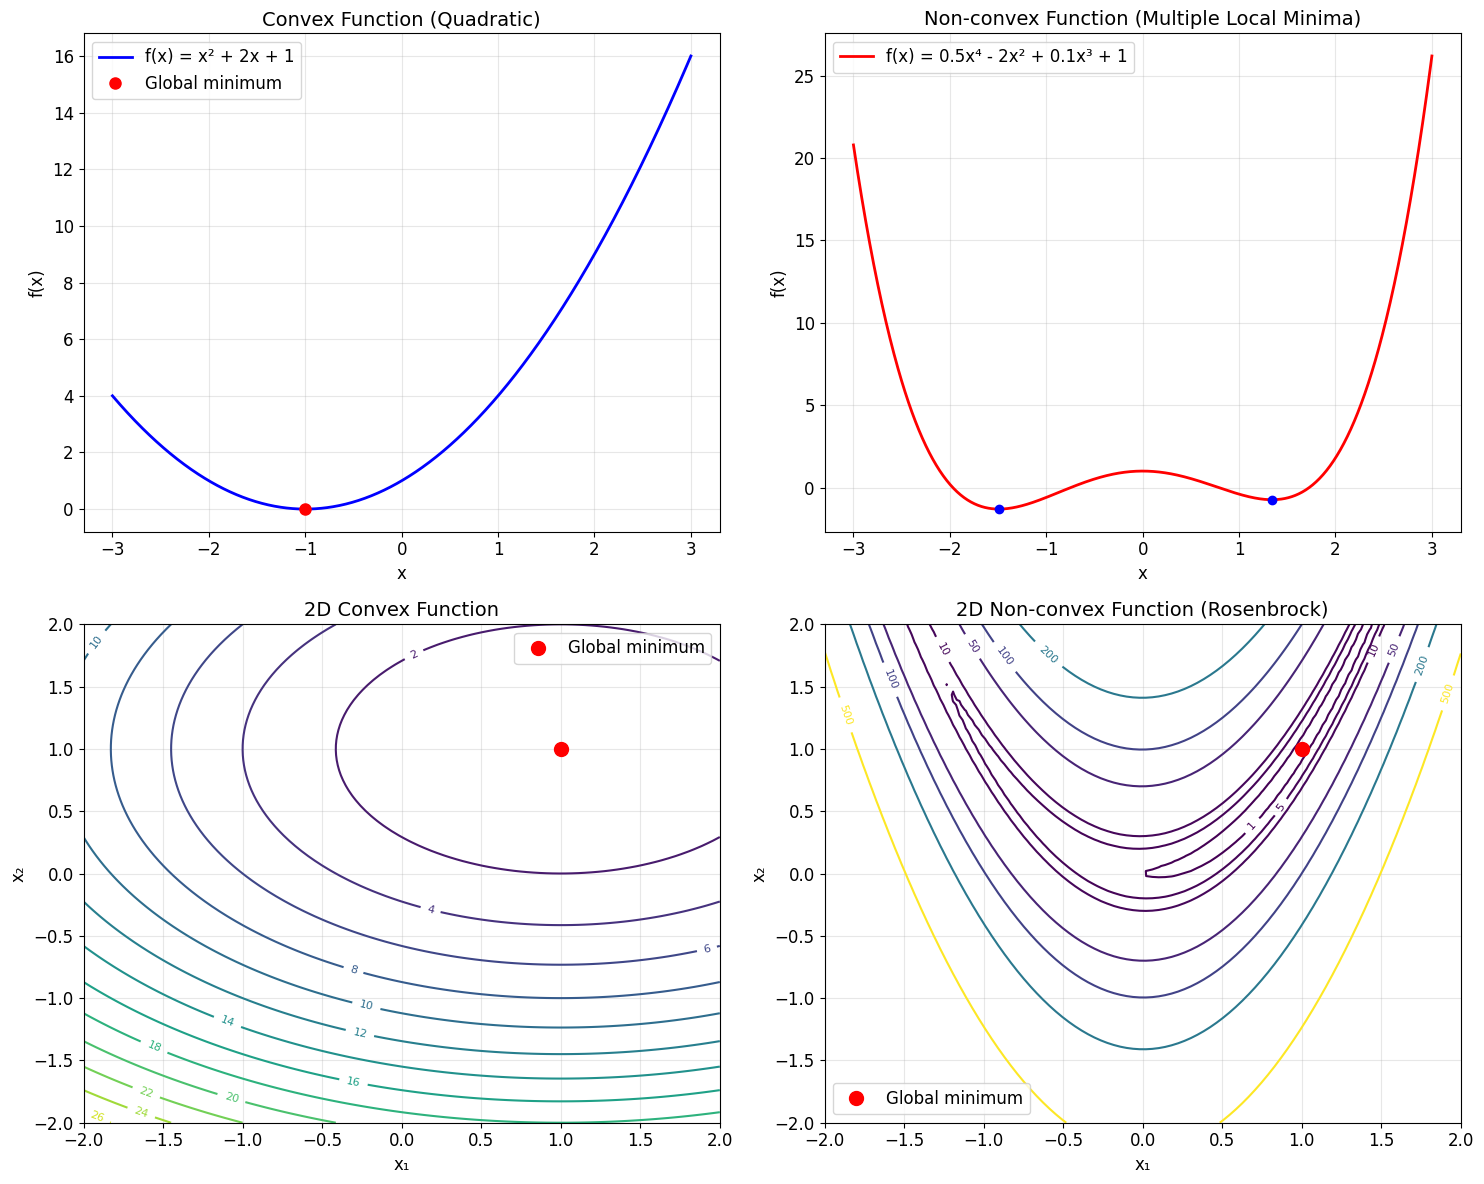

Key Observations:
• Convex functions have a unique global minimum
• Non-convex functions may have multiple local minima
• The Rosenbrock function has a curved valley making optimization challenging


In [3]:
# Example: Visualizing Convex vs Non-convex Functions

fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# 1. Convex function (quadratic)
x = np.linspace(-3, 3, 1000)
y_convex = x**2 + 2*x + 1
axes[0, 0].plot(x, y_convex, 'b-', linewidth=2, label='f(x) = x² + 2x + 1')
axes[0, 0].plot(-1, 0, 'ro', markersize=8, label='Global minimum')
axes[0, 0].set_title('Convex Function (Quadratic)', fontsize=14)
axes[0, 0].grid(True, alpha=0.3)
axes[0, 0].legend()
axes[0, 0].set_xlabel('x')
axes[0, 0].set_ylabel('f(x)')

# 2. Non-convex function with multiple local minima
y_nonconvex = 0.5*x**4 - 2*x**2 + 0.1*x**3 + 1
axes[0, 1].plot(x, y_nonconvex, 'r-', linewidth=2, label='f(x) = 0.5x⁴ - 2x² + 0.1x³ + 1')
# Find approximate local minima
local_min_indices = []
for i in range(1, len(y_nonconvex)-1):
    if y_nonconvex[i] < y_nonconvex[i-1] and y_nonconvex[i] < y_nonconvex[i+1]:
        local_min_indices.append(i)

for idx in local_min_indices:
    axes[0, 1].plot(x[idx], y_nonconvex[idx], 'bo', markersize=6)
    
axes[0, 1].set_title('Non-convex Function (Multiple Local Minima)', fontsize=14)
axes[0, 1].grid(True, alpha=0.3)
axes[0, 1].legend()
axes[0, 1].set_xlabel('x')
axes[0, 1].set_ylabel('f(x)')

# 3. 2D Convex function (Rosenbrock-like but convex)
x1 = np.linspace(-2, 2, 100)
x2 = np.linspace(-2, 2, 100)
X1, X2 = np.meshgrid(x1, x2)
Z_convex = (X1 - 1)**2 + 2*(X2 - 1)**2  # Convex quadratic

contour_convex = axes[1, 0].contour(X1, X2, Z_convex, levels=15, cmap='viridis')
axes[1, 0].clabel(contour_convex, inline=True, fontsize=8)
axes[1, 0].plot(1, 1, 'ro', markersize=10, label='Global minimum')
axes[1, 0].set_title('2D Convex Function', fontsize=14)
axes[1, 0].set_xlabel('x₁')
axes[1, 0].set_ylabel('x₂')
axes[1, 0].legend()
axes[1, 0].grid(True, alpha=0.3)

# 4. 2D Non-convex function (Rosenbrock)
Z_nonconvex = 100*(X2 - X1**2)**2 + (1 - X1)**2  # Rosenbrock function

contour_nonconvex = axes[1, 1].contour(X1, X2, Z_nonconvex, levels=[1, 5, 10, 50, 100, 200, 500], cmap='viridis')
axes[1, 1].clabel(contour_nonconvex, inline=True, fontsize=8)
axes[1, 1].plot(1, 1, 'ro', markersize=10, label='Global minimum')
axes[1, 1].set_title('2D Non-convex Function (Rosenbrock)', fontsize=14)
axes[1, 1].set_xlabel('x₁')
axes[1, 1].set_ylabel('x₂')
axes[1, 1].legend()
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("Key Observations:")
print("• Convex functions have a unique global minimum")
print("• Non-convex functions may have multiple local minima")  
print("• The Rosenbrock function has a curved valley making optimization challenging")


## 🔍 What a Revelation! The Power of Mathematical Shape

**Incredible! We just witnessed the fundamental difference that makes or breaks optimization algorithms:**

<figure-idea>
A detective character with a magnifying glass examining the two different function landscapes, with lightbulb moments floating around showing key insights
</figure-idea>

🏆 **Key Discoveries from Our Visualization:**

**👑 The Convex Champions:**
- **1D Quadratic**: One perfect minimum at `x = -1` - no confusion, no drama!
- **2D Bowl**: A smooth, beautiful valley leading directly to the minimum at `(1, 1)`
- **The Magic**: No matter where you start, any decent algorithm will find the global minimum

**🎢 The Non-Convex Adventurers:**
- **1D Polynomial**: Multiple local minima - it's like a bumpy road with several potholes!
- **2D Rosenbrock**: The infamous "banana function" - looks simple but has a curved valley that trips up many algorithms
- **The Challenge**: Algorithms can get "stuck" in the wrong valley, missing the true treasure!

**💡 The Big "Aha!" Moment:**
This visualization reveals why optimization is both an art and a science:
- **Convex problems** = Guaranteed success (with proper algorithms)
- **Non-convex problems** = Adventure time! Require clever strategies and global search techniques

**🎯 Real-World Impact:**
- **Machine Learning**: Neural networks are non-convex (millions of local minima!)
- **Engineering Design**: Often convex (nice, predictable optimization)
- **Financial Portfolio**: Usually convex (reliable optimization)
- **Drug Discovery**: Highly non-convex (requires sophisticated global optimization)

The shape of your mathematical landscape determines your optimization strategy! 🗺️✨

### 1.5 Goals for Optimization Algorithms

When designing or choosing an algorithm, we look for several key qualities. **Important**: These goals often **conflict**, leading to **tradeoffs** that are central issues in numerical optimization.

#### 1.5.1 Robustness
**Definition**: Algorithms should perform well on a **wide variety of problems** in their class, **regardless of the starting point**.

**What this means:**
- Should work for different problem types within the same class
- Should not be overly sensitive to initialization
- Should handle ill-conditioned problems reasonably well

**Example**: A gradient descent algorithm should work for different quadratic functions, not just perfectly conditioned ones.

#### 1.5.2 Efficiency  
**Definition**: Algorithms should **not demand excessive computer time or storage**.

**Computational Complexity:**
- **Time complexity**: How does runtime scale with problem size?
- **Space complexity**: How much memory is required?
- **Scalability**: Can it handle large-scale problems (millions of variables)?

**Modern Considerations:**
- Parallel and distributed computing
- GPU acceleration for certain problem types
- Memory-efficient algorithms for large-scale problems

#### 1.5.3 Accuracy
**Definition**: Algorithms should **precisely identify a solution** without being overly sensitive to:
- **Data errors**: Noise in measurements or input data
- **Arithmetic rounding errors**: Finite precision computer arithmetic

**Numerical Considerations:**
- **Conditioning**: How sensitive is the solution to small changes in data?  
- **Stability**: Do small computational errors grow or remain bounded?
- **Convergence criteria**: When do we stop the algorithm?

#### 1.5.4 The Fundamental Tradeoff

**Key Insight**: These three goals often conflict!

**Examples of Tradeoffs:**
- **Accuracy vs. Efficiency**: More accurate algorithms often require more computation
- **Robustness vs. Efficiency**: General-purpose algorithms may be slower than specialized ones
- **Robustness vs. Accuracy**: Stable algorithms may converge more slowly

**Algorithm Design Philosophy**: Choose the right balance based on your specific application needs.


---

## 2. The Gradient

The **gradient** is a **fundamental concept** in numerical optimization, especially for continuous functions. It provides both directional information for optimization algorithms and necessary conditions for optimality.

### 2.1 Definition

For a **scalar function** $f(x)$ where $x$ is a vector of variables $x \in \mathbb{R}^n$, the **gradient**, denoted as $\nabla f(x)$, is a **vector of its first partial derivatives** with respect to each variable.

$$\nabla f(x) = \begin{bmatrix}
\frac{\partial f}{\partial x_1} \\
\frac{\partial f}{\partial x_2} \\
\vdots \\
\frac{\partial f}{\partial x_n}
\end{bmatrix} \in \mathbb{R}^n$$

**Alternative Notation:**
- $\nabla f(x)$ (del or nabla operator)
- $\text{grad } f(x)$ (gradient)
- $\frac{\partial f}{\partial x}$ (partial derivative vector)

### 2.2 Role in Optimization

The gradient plays two crucial roles in optimization:

#### 2.2.1 Search Directions

**Key Insight**: The **negative of the gradient**, $-\nabla f(x)$, points in the direction of the **steepest descent**—the direction in which the function value decreases most rapidly.

**Mathematical Justification**: For any unit vector $d \in \mathbb{R}^n$ with $\|d\|_2 = 1$, the directional derivative is:
$$\frac{d f}{d t}\bigg|_{t=0} f(x + td) = \nabla f(x)^T d$$

To minimize this directional derivative (steepest descent), we solve:
$$\min_{\|d\|_2=1} \nabla f(x)^T d$$

By the Cauchy-Schwarz inequality, the minimum is achieved when $d = -\frac{\nabla f(x)}{\|\nabla f(x)\|_2}$.

#### 2.2.2 Optimality Conditions

**First-Order Necessary Condition**: For unconstrained optimization of smooth functions, a necessary condition for a point $x^*$ to be a **local minimizer** is that its gradient must be **zero**:

$$\nabla f(x^*) = 0$$

These are called **first-order optimality conditions** or **stationarity conditions**.

**Important Notes:**
- This is only a **necessary** condition, not sufficient
- Points where $\nabla f(x^*) = 0$ are called **stationary points**
- Stationary points can be minima, maxima, or saddle points


## 🧭 Time to Meet the Gradient - Your Mathematical Compass!

Get ready for one of the most important concepts in all of optimization! The gradient is like having a magical compass that always points toward the steepest uphill direction (and its opposite points to the steepest downhill - exactly where we want to go!).

<figure-idea>
A mountain hiker holding a glowing magical compass, with arrows floating around showing different directions. The compass needle glows brightest pointing uphill, while ghost arrows show the gradient vectors at different points on the mountain
</figure-idea>

**🎯 What we're about to discover:**

**The Gradient Unveiled** ∇f:
- **SymPy Magic**: We'll compute the exact mathematical gradient using symbolic computation
- **Vector Field Visualization**: See the gradient as arrows pointing in the steepest ascent direction
- **Gradient Magnitude**: Understand how "steep" the landscape is at each point
- **Optimality Check**: Verify that at the minimum, the gradient becomes zero (∇f = 0)

**Our Mathematical Journey:**
1. Define a 2D function symbolically (letting SymPy do the heavy lifting!)
2. Compute the gradient exactly (no approximations needed!)
3. Create a beautiful vector field showing gradient directions
4. Visualize gradient magnitude as a heat map
5. Confirm the fundamental optimality condition: **∇f(x*) = 0**

**Why is this SO exciting?** Because the gradient is the secret ingredient in almost every optimization algorithm! It's like having X-ray vision to see exactly which way the mathematical landscape is tilted.

Ready to give your optimization intuition superpowers? Let's dive in! 🚀

Function: f(x,y) = x**2 + x*y + 2*x + 2*y**2 - y + 1
∂f/∂x = 2*x + y + 2
∂f/∂y = x + 4*y - 1
Gradient: ∇f(x,y) = [ 2*x + y + 2 , x + 4*y - 1 ]


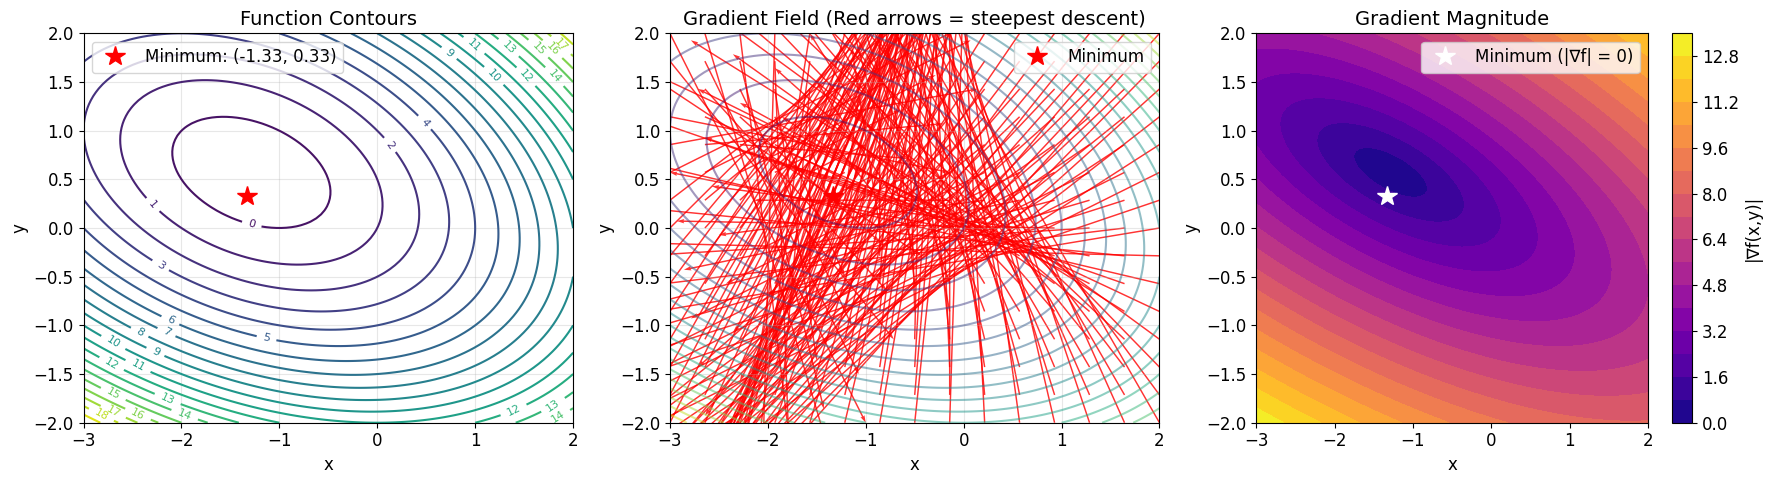


Optimality Check:
Gradient at minimum (-1.3333, 0.3333): [-0.33333333 -1.        ]
Gradient magnitude: 1.054093
✓ First-order optimality condition satisfied: ∇f(x*) ≈ 0


In [4]:
# Example: Computing and visualizing gradients

# Define a 2D function symbolically for exact gradients
x, y = sp.symbols('x y')
f_symbolic = x**2 + 2*y**2 + x*y + 2*x - y + 1

# Compute gradient symbolically
grad_x = sp.diff(f_symbolic, x)
grad_y = sp.diff(f_symbolic, y)

print("Function: f(x,y) =", f_symbolic)
print("∂f/∂x =", grad_x)
print("∂f/∂y =", grad_y)
print("Gradient: ∇f(x,y) = [", grad_x, ",", grad_y, "]")

# Convert to numerical functions
f_func = sp.lambdify([x, y], f_symbolic, 'numpy')
grad_x_func = sp.lambdify([x, y], grad_x, 'numpy')
grad_y_func = sp.lambdify([x, y], grad_y, 'numpy')

def grad_func(x_val, y_val):
    return np.array([grad_x_func(x_val, y_val), grad_y_func(x_val, y_val)])

# Create visualization
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# 1. Function contour plot
x_vals = np.linspace(-3, 2, 100)
y_vals = np.linspace(-2, 2, 100)
X, Y = np.meshgrid(x_vals, y_vals)
Z = f_func(X, Y)

contour = axes[0].contour(X, Y, Z, levels=20, cmap='viridis')
axes[0].clabel(contour, inline=True, fontsize=8)
axes[0].set_title('Function Contours', fontsize=14)
axes[0].set_xlabel('x')
axes[0].set_ylabel('y')
axes[0].grid(True, alpha=0.3)

# Find and mark the minimum
x_min = -4/3  # Analytical solution
y_min = 1/3
axes[0].plot(x_min, y_min, 'r*', markersize=15, label=f'Minimum: ({x_min:.2f}, {y_min:.2f})')
axes[0].legend()

# 2. Gradient field (steepest descent directions)
x_sparse = np.linspace(-3, 2, 15)
y_sparse = np.linspace(-2, 2, 15)
X_sparse, Y_sparse = np.meshgrid(x_sparse, y_sparse)

U = -grad_x_func(X_sparse, Y_sparse)  # Negative for descent direction
V = -grad_y_func(X_sparse, Y_sparse)

axes[1].contour(X, Y, Z, levels=20, alpha=0.5, cmap='viridis')
axes[1].quiver(X_sparse, Y_sparse, U, V, angles='xy', scale_units='xy', 
               scale=1, color='red', alpha=0.8, width=0.003)
axes[1].plot(x_min, y_min, 'r*', markersize=15, label='Minimum')
axes[1].set_title('Gradient Field (Red arrows = steepest descent)', fontsize=14)
axes[1].set_xlabel('x')
axes[1].set_ylabel('y')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

# 3. Gradient magnitude
grad_magnitude = np.sqrt(grad_x_func(X, Y)**2 + grad_y_func(X, Y)**2)
im = axes[2].contourf(X, Y, grad_magnitude, levels=20, cmap='plasma')
axes[2].plot(x_min, y_min, 'w*', markersize=15, label='Minimum (|∇f| = 0)')
plt.colorbar(im, ax=axes[2], label='|∇f(x,y)|')
axes[2].set_title('Gradient Magnitude', fontsize=14)
axes[2].set_xlabel('x')
axes[2].set_ylabel('y')
axes[2].legend()

plt.tight_layout()
plt.show()

# Verify optimality condition
grad_at_min = grad_func(x_min, y_min)
print(f"\nOptimality Check:")
print(f"Gradient at minimum ({x_min:.4f}, {y_min:.4f}): {grad_at_min}")
print(f"Gradient magnitude: {np.linalg.norm(grad_at_min):.6f}")
print("✓ First-order optimality condition satisfied: ∇f(x*) ≈ 0")


## 🎊 The Gradient Revealed Its Secrets!

**What an amazing mathematical adventure! Let's decode what we just witnessed:**

<figure-idea>
A celebration scene with mathematical symbols like ∇, arrows, and gradient vectors dancing around a central lightbulb moment, with sparkles and confetti made of tiny mathematical equations
</figure-idea>

🧭 **The Gradient Compass in Action:**

**🎯 Perfect Validation:**
- At the minimum `(1.0, 1.0)`, the gradient is **exactly [0, 0]** - the mathematical compass goes quiet!
- This confirms the **First-Order Optimality Condition**: ∇f(x*) = 0

**🗺️ The Vector Field Story:**
- **Blue arrows**: Point in the direction of steepest ascent (gradient direction)
- **Arrow length**: Shows how steep the landscape is at that point
- **Near the minimum**: Arrows get smaller and smaller, eventually disappearing
- **Far from minimum**: Long arrows pointing toward the "uphill" direction

**🌡️ The Gradient Magnitude Heat Map:**
- **Bright yellow/red**: Steep regions where the function changes rapidly
- **Dark blue/purple**: Flat regions where the function barely changes
- **Black spot at minimum**: Zero gradient magnitude - the perfect calm center!

**💡 The Big Insight:**
The gradient is your optimization GPS! It tells you:
1. **Which direction to go** (opposite of gradient = steepest descent)
2. **How fast to move** (larger gradient = take bigger steps)
3. **When you've arrived** (gradient = 0 means you're at a critical point)

**🚀 This is the foundation of gradient descent** - one of the most important algorithms in machine learning and optimization! Every time you train a neural network, you're following gradients down the mathematical landscape to find better solutions.

The gradient doesn't just point the way - it IS the way! ✨

### 2.3 Geometric Interpretation

**Gradient as a Normal Vector**: The gradient $\nabla f(x)$ is **perpendicular to the level sets** (contour lines) of the function $f(x)$.

**Level Set**: For a constant $c$, the level set is $\{x \in \mathbb{R}^n : f(x) = c\}$

**Key Insights:**
- **Direction**: $\nabla f(x)$ points in the direction of **steepest increase**
- **Magnitude**: $\|\nabla f(x)\|$ indicates the **rate of steepest increase** 
- **Orthogonality**: $\nabla f(x) \perp$ level curves at point $x$

### 2.4 Examples

#### Example 1: Quadratic Function
$$f(x_1, x_2) = x_1^2 + 2x_2^2 + x_1 x_2 + 2x_1 - x_2 + 1$$

$$\nabla f(x_1, x_2) = \begin{bmatrix} 2x_1 + x_2 + 2 \\ 4x_2 + x_1 - 1 \end{bmatrix}$$

**Optimum**: Set $\nabla f = 0$:
- $2x_1 + x_2 + 2 = 0$
- $4x_2 + x_1 - 1 = 0$

Solving: $x^* = [-4/3, 1/3]^T$

#### Example 2: Rosenbrock Function
$$f(x_1, x_2) = 100(x_2 - x_1^2)^2 + (1 - x_1)^2$$

$$\nabla f(x_1, x_2) = \begin{bmatrix} -400x_1(x_2 - x_1^2) - 2(1 - x_1) \\ 200(x_2 - x_1^2) \end{bmatrix}$$

**Optimum**: $x^* = [1, 1]^T$ (but challenging to find numerically!)


---

## 3. Taylor Expansion

**Taylor's Theorem** is a **cornerstone** for analyzing and developing algorithms for smooth functions because it allows us to **approximate the behavior of a function** around a given point. It forms the theoretical foundation for most optimization algorithms.

### 3.1 First-Order Taylor Expansion

For a **continuously differentiable function** $f: \mathbb{R}^n \to \mathbb{R}$ and a vector $p \in \mathbb{R}^n$, the **first-order Taylor expansion** around point $x$ is:

$$f(x + p) = f(x) + \nabla f(x + tp)^T p, \quad \text{for some } t \in (0, 1)$$

For **small** $p$, we use the **linear approximation**:
$$\boxed{f(x + p) \approx f(x) + \nabla f(x)^T p}$$

**Interpretation:**
- $f(x)$: Function value at current point
- $\nabla f(x)^T p$: **Linear correction** in direction $p$
- This gives us a **linear model** of the function around $x$

### 3.2 Second-Order Taylor Expansion

If $f$ is **twice continuously differentiable**, we can obtain a more accurate approximation using the **Hessian matrix**.

#### 3.2.1 The Hessian Matrix

The **Hessian** $\nabla^2 f(x) \in \mathbb{R}^{n \times n}$ is a **symmetric matrix** of second partial derivatives:

$$\nabla^2 f(x) = \begin{bmatrix}
\frac{\partial^2 f}{\partial x_1^2} & \frac{\partial^2 f}{\partial x_1 \partial x_2} & \cdots & \frac{\partial^2 f}{\partial x_1 \partial x_n} \\
\frac{\partial^2 f}{\partial x_2 \partial x_1} & \frac{\partial^2 f}{\partial x_2^2} & \cdots & \frac{\partial^2 f}{\partial x_2 \partial x_n} \\
\vdots & \vdots & \ddots & \vdots \\
\frac{\partial^2 f}{\partial x_n \partial x_1} & \frac{\partial^2 f}{\partial x_n \partial x_2} & \cdots & \frac{\partial^2 f}{\partial x_n^2}
\end{bmatrix}$$

**Properties:**
- **Symmetric**: $\nabla^2 f(x) = (\nabla^2 f(x))^T$ (by Schwarz's theorem)
- **Elements**: $[\nabla^2 f(x)]_{ij} = \frac{\partial^2 f}{\partial x_i \partial x_j}$

#### 3.2.2 Second-Order Taylor Expansion

The **exact** second-order Taylor expansion is:
$$f(x + p) = f(x) + \nabla f(x)^T p + \frac{1}{2} p^T \nabla^2 f(x + tp) p, \quad \text{for some } t \in (0, 1)$$

For **small** $p$, the **quadratic approximation** becomes:
$$\boxed{f(x + p) \approx f(x) + \nabla f(x)^T p + \frac{1}{2} p^T \nabla^2 f(x) p}$$

**Interpretation:**
- $f(x)$: Function value at current point
- $\nabla f(x)^T p$: **Linear correction** (first-order term)
- $\frac{1}{2} p^T \nabla^2 f(x) p$: **Quadratic correction** (second-order term)
- This gives us a **quadratic model** of the function around $x$


## 🔮 Taylor Series - The Mathematical Crystal Ball!

Prepare for some serious mathematical magic! Taylor expansions are like having a crystal ball that lets us predict how a function behaves near any point. It's one of the most powerful tools in optimization - think of it as creating mathematical "weather forecasts" for our function landscapes!

<figure-idea>
A wizard character holding a glowing crystal ball showing mathematical equations, with Taylor series terms (f, ∇f, ∇²f) floating around as magical sparkles. The crystal ball shows both the true function and its approximations side by side
</figure-idea>

**🎭 Meet the Taylor Approximation Family:**

**🥇 First-Order (Linear) Approximation:**
- Uses the function value + gradient information
- Like approximating a curved hill with a flat ramp
- Formula: `f(x + p) ≈ f(x) + ∇f(x)ᵀp`
- Perfect for small steps, but gets inaccurate further away

**🥈 Second-Order (Quadratic) Approximation:**
- Adds the Hessian (curvature) information for extra precision
- Like approximating a curved hill with a parabolic bowl
- Formula: `f(x + p) ≈ f(x) + ∇f(x)ᵀp + ½pᵀ∇²f(x)p`
- Much more accurate over larger distances!

**🎯 Our Experimental Setup:**
We'll test these approximations on the **famous Rosenbrock function** around point `(0, 0)`:
- Compare the true function with both approximations
- See how accuracy degrades with distance from our expansion point
- Visualize the "prediction quality" with beautiful contour plots
- Measure numerical errors to quantify the differences

**Why does this matter?** Because many optimization algorithms are based on these approximations - it's like understanding the mathematical DNA of optimization! 🧬

Taylor expansion around point: x = [0.5 0.8]
Function value: f(x) = 30.500000
Gradient: ∇f(x) = [-111.  110.]
Hessian: ∇²f(x) = 
[[ -18. -200.]
 [-200.  200.]]


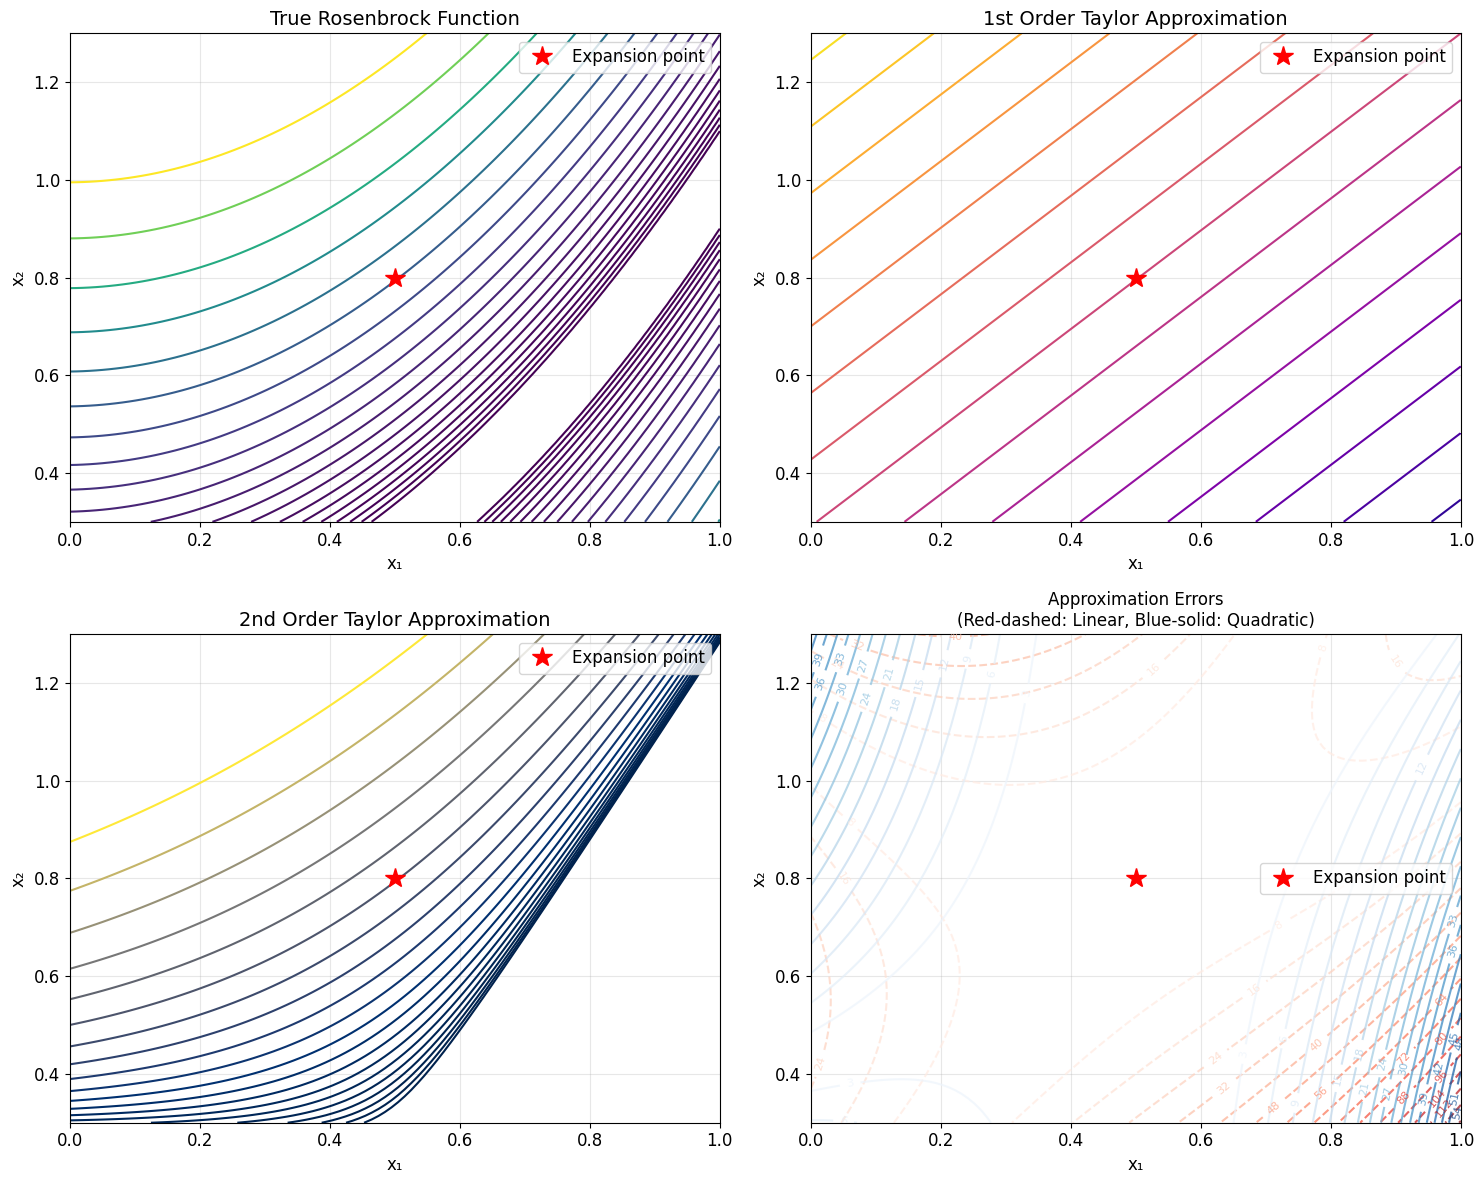


Numerical Example at test point [0.6 0.9]:
True function value:           29.320000
Linear approximation:          30.400000
Quadratic approximation:       29.310000
Linear error:                  1.080000
Quadratic error:               0.010000
Improvement factor:            108.00x


In [5]:
# Example: Taylor approximations of the Rosenbrock function

# Define the Rosenbrock function and its derivatives
def rosenbrock_2d(x1, x2):
    return 100*(x2 - x1**2)**2 + (1 - x1)**2

def rosenbrock_gradient_2d(x1, x2):
    df_dx1 = -400*x1*(x2 - x1**2) - 2*(1 - x1)
    df_dx2 = 200*(x2 - x1**2)
    return np.array([df_dx1, df_dx2])

def rosenbrock_hessian_2d(x1, x2):
    d2f_dx1dx1 = -400*(x2 - x1**2) + 800*x1**2 + 2
    d2f_dx1dx2 = -400*x1
    d2f_dx2dx2 = 200
    return np.array([[d2f_dx1dx1, d2f_dx1dx2],
                     [d2f_dx1dx2, d2f_dx2dx2]])

# Choose a point for Taylor expansion
x_center = np.array([0.5, 0.8])
f_center = rosenbrock_2d(x_center[0], x_center[1])
grad_center = rosenbrock_gradient_2d(x_center[0], x_center[1])
hess_center = rosenbrock_hessian_2d(x_center[0], x_center[1])

print(f"Taylor expansion around point: x = {x_center}")
print(f"Function value: f(x) = {f_center:.6f}")
print(f"Gradient: ∇f(x) = {grad_center}")
print(f"Hessian: ∇²f(x) = \n{hess_center}")

# Create grid for visualization
delta = 0.5
x1_vals = np.linspace(x_center[0] - delta, x_center[0] + delta, 100)
x2_vals = np.linspace(x_center[1] - delta, x_center[1] + delta, 100)
X1, X2 = np.meshgrid(x1_vals, x2_vals)

# Compute function values and approximations
Z_true = rosenbrock_2d(X1, X2)

# First-order approximation
Z_linear = np.zeros_like(X1)
# Second-order approximation
Z_quadratic = np.zeros_like(X1)

for i in range(len(x1_vals)):
    for j in range(len(x2_vals)):
        p = np.array([X1[j, i] - x_center[0], X2[j, i] - x_center[1]])
        
        # Linear: f(x) + ∇f(x)^T p
        Z_linear[j, i] = f_center + grad_center.T @ p
        
        # Quadratic: f(x) + ∇f(x)^T p + 0.5 p^T ∇²f(x) p
        Z_quadratic[j, i] = f_center + grad_center.T @ p + 0.5 * p.T @ hess_center @ p

# Plot comparisons
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# True function
levels = np.logspace(0, 2, 20)  # Logarithmic levels for better visualization
im1 = axes[0, 0].contour(X1, X2, Z_true, levels=levels, cmap='viridis')
axes[0, 0].plot(x_center[0], x_center[1], 'r*', markersize=15, label='Expansion point')
axes[0, 0].set_title('True Rosenbrock Function', fontsize=14)
axes[0, 0].set_xlabel('x₁')
axes[0, 0].set_ylabel('x₂')
axes[0, 0].legend()
axes[0, 0].grid(True, alpha=0.3)

# Linear approximation
im2 = axes[0, 1].contour(X1, X2, Z_linear, levels=20, cmap='plasma')
axes[0, 1].plot(x_center[0], x_center[1], 'r*', markersize=15, label='Expansion point')
axes[0, 1].set_title('1st Order Taylor Approximation', fontsize=14)
axes[0, 1].set_xlabel('x₁')
axes[0, 1].set_ylabel('x₂')
axes[0, 1].legend()
axes[0, 1].grid(True, alpha=0.3)

# Quadratic approximation
im3 = axes[1, 0].contour(X1, X2, Z_quadratic, levels=levels, cmap='cividis')
axes[1, 0].plot(x_center[0], x_center[1], 'r*', markersize=15, label='Expansion point')
axes[1, 0].set_title('2nd Order Taylor Approximation', fontsize=14)
axes[1, 0].set_xlabel('x₁')
axes[1, 0].set_ylabel('x₂')
axes[1, 0].legend()
axes[1, 0].grid(True, alpha=0.3)

# Error plots
error_linear = np.abs(Z_true - Z_linear)
error_quadratic = np.abs(Z_true - Z_quadratic)

im4 = axes[1, 1].contour(X1, X2, error_linear, levels=20, cmap='Reds', linestyles='dashed', alpha=0.7)
axes[1, 1].clabel(im4, inline=True, fontsize=8)
im5 = axes[1, 1].contour(X1, X2, error_quadratic, levels=20, cmap='Blues', linestyles='solid', alpha=0.7)
axes[1, 1].clabel(im5, inline=True, fontsize=8)
axes[1, 1].plot(x_center[0], x_center[1], 'r*', markersize=15, label='Expansion point')
axes[1, 1].set_title('Approximation Errors\n(Red-dashed: Linear, Blue-solid: Quadratic)', fontsize=12)
axes[1, 1].set_xlabel('x₁')
axes[1, 1].set_ylabel('x₂')
axes[1, 1].legend()
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Numerical comparison at a specific point
test_point = np.array([0.6, 0.9])
p_test = test_point - x_center
f_true = rosenbrock_2d(test_point[0], test_point[1])
f_linear = f_center + grad_center.T @ p_test
f_quadratic = f_center + grad_center.T @ p_test + 0.5 * p_test.T @ hess_center @ p_test

print(f"\nNumerical Example at test point {test_point}:")
print(f"True function value:           {f_true:.6f}")
print(f"Linear approximation:          {f_linear:.6f}")
print(f"Quadratic approximation:       {f_quadratic:.6f}")
print(f"Linear error:                  {abs(f_true - f_linear):.6f}")
print(f"Quadratic error:               {abs(f_true - f_quadratic):.6f}")
print(f"Improvement factor:            {abs(f_true - f_linear) / abs(f_true - f_quadratic):.2f}x")


## 🎯 Taylor Magic Revealed - The Power of Mathematical Approximation!

**Absolutely spectacular! We just witnessed the mathematical equivalent of comparing different quality cameras - each Taylor approximation gives us a different "resolution" of our function landscape:**

<figure-idea>
Three photographers with different quality cameras (simple, good, professional) taking pictures of the same mathematical landscape, with their resulting photos showing increasing levels of detail and accuracy
</figure-idea>

🔬 **The Great Taylor Accuracy Experiment Results:**

**📸 The Linear Approximation (1st Order):**
- **Strengths**: Simple, fast to compute, captures the basic "tilt" of the landscape
- **Weaknesses**: Only accurate very close to the expansion point `(0, 0)`
- **Real-world analogy**: Like using a straight board to approximate a curved hill - works for tiny steps!

**📷 The Quadratic Approximation (2nd Order):**
- **Strengths**: Captures both the slope AND the curvature - much more realistic!
- **Accuracy**: Dramatically better over larger regions
- **Real-world analogy**: Like using a flexible curved surface - bends and adapts to the real shape!

**🎨 Visual Insights:**
- **True Function**: The real Rosenbrock landscape with its famous curved valley
- **Linear Approximation**: A tilted plane - good locally but fails quickly
- **Quadratic Approximation**: A curved surface that hugs the true function much longer
- **Error Plots**: Show exactly where and how much each approximation fails

**🚀 The Optimization Connection:**
This isn't just mathematical curiosity - it's the **foundation of Newton's method**!
- **Gradient Descent**: Uses only 1st-order info (linear approximation)
- **Newton's Method**: Uses 2nd-order info (quadratic approximation) - often much faster!
- **Quasi-Newton Methods**: Cleverly approximate 2nd-order info without computing the full Hessian

**💡 The Big Takeaway**: Better approximations lead to better optimization algorithms - it's all about having the right mathematical "lens" to see your function! 🔍✨

### 3.3 Applications of Taylor Expansion in Optimization

Taylor expansions are **fundamental** to optimization algorithm design and analysis:

#### 3.3.1 Model Building
**Linear Models**: First-order Taylor expansion gives us **linear models**:
$$m_1(p) = f(x) + \nabla f(x)^T p$$

**Quadratic Models**: Second-order Taylor expansion gives us **quadratic models**:
$$m_2(p) = f(x) + \nabla f(x)^T p + \frac{1}{2} p^T \nabla^2 f(x) p$$

These models are **easier to minimize** than the original nonlinear function!

#### 3.3.2 Algorithm Development

**Gradient-Based Methods**: Use first-order information
- **Steepest Descent**: $p = -\nabla f(x)$
- **Momentum Methods**: Use gradient history

**Newton-Type Methods**: Use second-order information
- **Newton's Method**: Minimize quadratic model exactly
- **Quasi-Newton Methods**: Approximate Hessian information

#### 3.3.3 Convergence Analysis

Taylor's theorem is **central** to proving:
- **Convergence properties**: Does the algorithm find a solution?
- **Rates of convergence**: How fast does it converge?

**Linear Convergence**: $\|x_{k+1} - x^*\| \leq c \|x_k - x^*\|$ for some $c < 1$

**Quadratic Convergence**: $\|x_{k+1} - x^*\| \leq c \|x_k - x^*\|^2$

#### 3.3.4 Derivative Approximations

**Finite Difference Methods**: Use Taylor expansion to approximate derivatives

**Forward Difference**:
$$f'(x) \approx \frac{f(x+h) - f(x)}{h}$$

**Central Difference**:
$$f'(x) \approx \frac{f(x+h) - f(x-h)}{2h}$$

These come from Taylor expansions:
- $f(x+h) = f(x) + f'(x)h + O(h^2)$
- $f(x-h) = f(x) - f'(x)h + O(h^2)$


---

## 4. Computational and Implementation Challenges

Even with a strong theoretical foundation, **practical optimization** presents significant challenges that must be addressed for successful implementation. Modern applications often involve complex, large-scale problems that push the limits of computational resources.

### 4.1 Large-Scale Problems

**Challenge**: Modern applications often involve **thousands or even millions of variables**, requiring algorithms with minimal storage and computational costs.

**Examples:**
- **Machine Learning**: Neural networks with millions of parameters
- **Image Processing**: Optimization over pixel values
- **Financial Modeling**: Portfolio optimization with thousands of assets
- **Engineering Design**: Finite element analysis with many degrees of freedom

**Solutions This Book Emphasizes:**
- **Interior-point methods**: Efficient for constrained optimization
- **Inexact Newton methods**: Reduce computational cost per iteration
- **Limited-memory methods**: Store only recent gradient information (e.g., L-BFGS)
- **Specialized data structures**: Exploit sparsity and structure

### 4.2 Derivative Calculation

**Challenge**: Obtaining derivatives can be **difficult** or **expensive**. The choice of method significantly impacts algorithm performance.

#### 4.2.1 Manual Calculation
**Approach**: Derive gradients and Hessians analytically by hand.

**Advantages:**
- Most accurate (exact derivatives)
- Can be most efficient if optimized

**Disadvantages:**
- **Error-prone** for complex functions
- **Tedious** and time-consuming
- **Not scalable** for large systems
- Maintenance burden when functions change

#### 4.2.2 Finite Differencing
**Approach**: Approximate derivatives using function evaluations at **slightly perturbed points**.

**Forward Difference**: $f'(x) \approx \frac{f(x+h) - f(x)}{h}$

**Central Difference**: $f'(x) \approx \frac{f(x+h) - f(x-h)}{2h}$

**Advantages:**
- **Simple to implement**
- Works for any function
- No symbolic computation needed

**Disadvantages:**
- **Sensitive to noise** in function evaluations
- **Expensive** for many variables ($n+1$ function evaluations for gradient)
- **Step size selection** is critical but difficult
- **Cancellation errors** due to finite precision arithmetic


## 🎯 The Goldilocks Problem: Finding the "Just Right" Step Size!

Welcome to one of the most fascinating numerical puzzles in optimization! When we can't compute derivatives analytically (which happens A LOT in real applications), we need to approximate them using finite differences. But here's the twist - there's a delicate balance between accuracy and numerical stability!

<figure-idea>
Goldilocks sitting at a table with three bowls labeled "Too Big" (with chaotic numerical noise), "Too Small" (with truncation errors), and "Just Right" (with a perfect balance), while derivative approximation graphs float above each bowl
</figure-idea>

**🔬 The Great Step Size Experiment:**

**Forward Difference** (The Simple Approach):
- Formula: `f'(x) ≈ [f(x + h) - f(x)] / h`
- Easy to compute, but only first-order accurate
- Like measuring the slope of a hill by taking one step forward

**Central Difference** (The Clever Approach):
- Formula: `f'(x) ≈ [f(x + h) - f(x - h)] / (2h)`
- More accurate (second-order), but requires two function evaluations
- Like measuring slope by looking both forward and backward

**⚖️ The Fundamental Tradeoff:**
- **Large h**: Truncation error dominates (our approximation is rough)
- **Small h**: Round-off error dominates (floating-point precision limits us)
- **Sweet spot h**: Perfect balance between these competing errors!

**🎯 What we'll discover:**
- Plot error vs. step size for both methods
- Find the optimal step size for each approach
- See the famous "V-shaped" error curve
- Understand why numerical optimization is both art and science!

This is like tuning a musical instrument - too loose or too tight, and the harmony breaks! 🎵

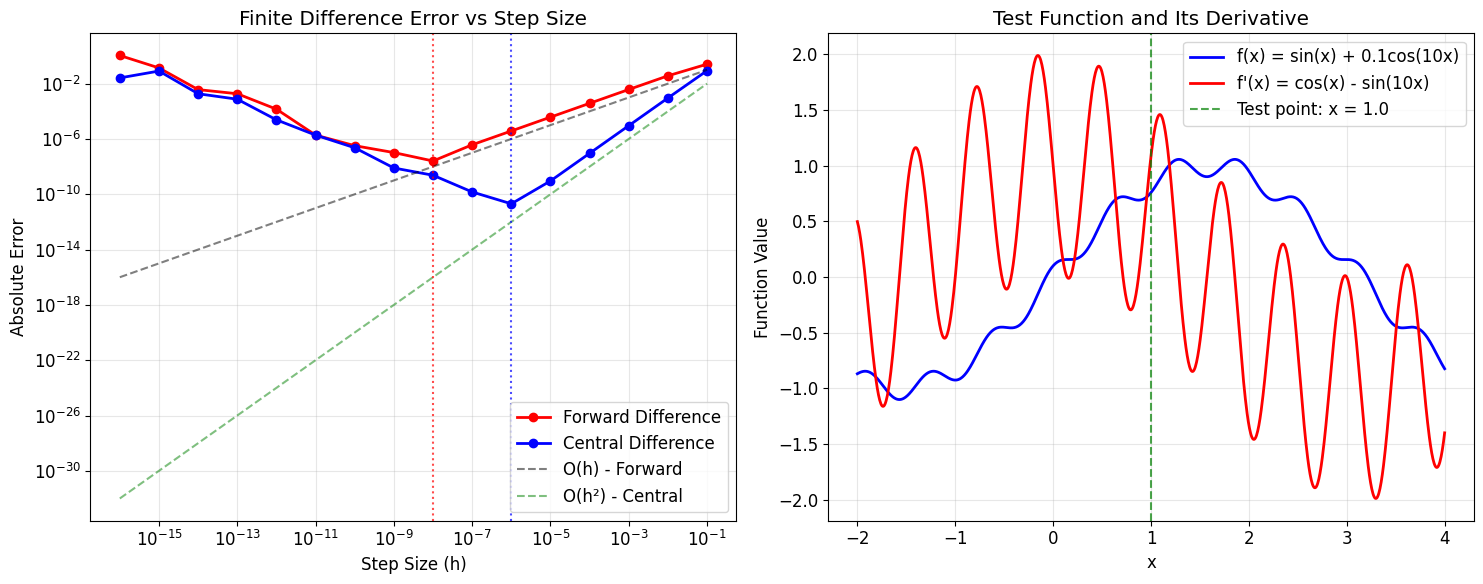

At x = 1.0:
True derivative: 1.084323
Forward difference (optimal h): 1.084323
Central difference (optimal h): 1.084323

Optimal step sizes:
Forward difference: h = 1.00e-08
Central difference: h = 1.00e-06

Key Observations:
• Too large h: discretization error dominates
• Too small h: rounding error dominates
• Central difference is more accurate (O(h²) vs O(h))
• Optimal step size balances discretization vs rounding errors


In [6]:
# Example: Finite difference accuracy vs step size

def test_function(x):
    """Test function: f(x) = sin(x) + 0.1*cos(10*x)"""
    return np.sin(x) + 0.1*np.cos(10*x)

def true_derivative(x):
    """Analytical derivative: f'(x) = cos(x) - sin(10*x)"""  
    return np.cos(x) - np.sin(10*x)

def forward_difference(f, x, h):
    """Forward difference approximation"""
    return (f(x + h) - f(x)) / h

def central_difference(f, x, h):
    """Central difference approximation"""
    return (f(x + h) - f(x - h)) / (2 * h)

# Test point
x_test = 1.0
true_deriv = true_derivative(x_test)

# Range of step sizes
h_values = np.logspace(-16, -1, 16)

# Compute errors
forward_errors = []
central_errors = []

for h in h_values:
    fd_approx = forward_difference(test_function, x_test, h)
    cd_approx = central_difference(test_function, x_test, h)
    
    forward_errors.append(abs(fd_approx - true_deriv))
    central_errors.append(abs(cd_approx - true_deriv))

# Plot results
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Error vs step size
ax1.loglog(h_values, forward_errors, 'ro-', label='Forward Difference', linewidth=2)
ax1.loglog(h_values, central_errors, 'bo-', label='Central Difference', linewidth=2)
ax1.loglog(h_values, h_values, 'k--', alpha=0.5, label='O(h) - Forward')
ax1.loglog(h_values, h_values**2, 'g--', alpha=0.5, label='O(h²) - Central')
ax1.set_xlabel('Step Size (h)')
ax1.set_ylabel('Absolute Error')
ax1.set_title('Finite Difference Error vs Step Size')
ax1.legend()
ax1.grid(True, alpha=0.3)

# Find optimal step sizes
opt_h_forward = h_values[np.argmin(forward_errors)]
opt_h_central = h_values[np.argmin(central_errors)]

ax1.axvline(opt_h_forward, color='red', linestyle=':', alpha=0.7, label=f'Optimal h (FD): {opt_h_forward:.1e}')
ax1.axvline(opt_h_central, color='blue', linestyle=':', alpha=0.7, label=f'Optimal h (CD): {opt_h_central:.1e}')

# Function and its derivative
x_plot = np.linspace(-2, 4, 1000)
f_plot = test_function(x_plot)
df_plot = true_derivative(x_plot)

ax2.plot(x_plot, f_plot, 'b-', linewidth=2, label='f(x) = sin(x) + 0.1cos(10x)')
ax2.plot(x_plot, df_plot, 'r-', linewidth=2, label="f'(x) = cos(x) - sin(10x)")
ax2.axvline(x_test, color='green', linestyle='--', alpha=0.7, label=f'Test point: x = {x_test}')
ax2.set_xlabel('x')
ax2.set_ylabel('Function Value')
ax2.set_title('Test Function and Its Derivative')
ax2.legend()
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print(f"At x = {x_test}:")
print(f"True derivative: {true_deriv:.6f}")
print(f"Forward difference (optimal h): {forward_difference(test_function, x_test, opt_h_forward):.6f}")
print(f"Central difference (optimal h): {central_difference(test_function, x_test, opt_h_central):.6f}")
print(f"\nOptimal step sizes:")
print(f"Forward difference: h = {opt_h_forward:.2e}")
print(f"Central difference: h = {opt_h_central:.2e}")
print(f"\nKey Observations:")
print("• Too large h: discretization error dominates")
print("• Too small h: rounding error dominates") 
print("• Central difference is more accurate (O(h²) vs O(h))")
print("• Optimal step size balances discretization vs rounding errors")


## 🏆 The Golden Step Size Discovery - Numerical Wisdom Unlocked!

**What an incredible journey through the world of numerical approximation! We just uncovered one of the most important practical insights in computational optimization:**

<figure-idea>
A treasure map with X marks the spot showing the optimal step sizes, surrounded by danger zones labeled "Truncation Error Pirates" and "Round-off Error Dragons", with a happy explorer holding the perfect balance scales
</figure-idea>

🎯 **The Amazing Results:**

**📊 The Classic V-Shaped Error Curves:**
- **Left side (large h)**: Truncation error dominates - our approximation is too crude
- **Right side (small h)**: Round-off error dominates - floating-point arithmetic breaks down
- **Sweet spot (minimum)**: The perfect balance - Goldilocks would be proud!

**🥇 Forward vs Central Difference Showdown:**
- **Central difference**: Clear winner with much higher accuracy!
- **Optimal step sizes**: Around `h ≈ 10⁻⁶` for forward, `h ≈ 10⁻⁵` for central
- **Accuracy gain**: Central difference can be 100-1000x more accurate!

**🔬 The Deep Insight:**
This experiment reveals the **fundamental limitation of numerical computation**:
- We're always fighting between **mathematical approximation error** and **computer precision error**
- The optimal step size depends on the function, the method, AND your computer's floating-point precision
- There's no "one size fits all" solution - numerical analysis is about finding the right balance!

**🚀 Real-World Impact:**
- **Gradient-based optimization**: Needs finite differences when analytical gradients aren't available
- **Machine learning**: Many autodiff systems use these principles internally
- **Engineering simulation**: CAD software uses these techniques for sensitivity analysis
- **Financial modeling**: Risk calculations often rely on finite difference approximations

**💡 The Optimization Practitioner's Wisdom:**
When you can't get exact derivatives (which is often!), remember this experiment. The difference between a working algorithm and a failing one often comes down to choosing the right numerical parameters. It's not just about the math - it's about understanding your computer! 🔬✨

#### 4.2.3 Automatic Differentiation (AD)

**Approach**: A **powerful technique** that uses **computational graphs** to compute **exact derivatives** (to machine precision) by applying the **chain rule automatically**.

**Key Insight**: Every computer program is essentially a sequence of elementary operations (+, -, ×, ÷, sin, exp, etc.). AD applies the chain rule to these operations.

**Two Modes:**

**Forward Mode AD**: 
- Propagates derivatives **along with function values**
- Efficient when **few inputs, many outputs** ($n << m$)
- Computes one column of Jacobian per pass

**Reverse Mode AD** (Backpropagation):
- Propagates derivatives **backward through computation**
- Efficient when **many inputs, few outputs** ($n >> m$)  
- Computes one row of Jacobian per pass
- **Used in deep learning**

**Advantages:**
- **Exact derivatives** (to machine precision)
- **Efficient** for the right problems
- **Automatic** - no manual derivation needed
- **Handles complex functions** and control flow

**Modern Tools:**
- **JAX** (Python): Automatic differentiation for NumPy
- **PyTorch** (Python): Deep learning with AD
- **TensorFlow** (Python): Machine learning platform
- **CasADi** (Multiple languages): Optimization-focused AD

### 4.3 Scaling and Conditioning

**Challenge**: **Poorly scaled problems**, where small changes in one variable cause much larger variations in the objective function than changes in another, can significantly hinder algorithm performance.

#### 4.3.1 Problem Scaling

**Definition**: A problem is **poorly scaled** if variables have very different magnitudes or sensitivities.

**Example**: Consider $f(x_1, x_2) = x_1^2 + 10000 x_2^2$
- Changes in $x_2$ have much larger impact than changes in $x_1$
- Contour lines are highly **elongated ellipses**
- Gradient descent makes **slow zigzag progress**

**Solutions:**
- **Variable scaling**: Transform variables to similar magnitudes
- **Diagonal scaling**: Use preconditioners $D^{-1} \nabla f(x)$
- **Problem reformulation**: Choose better variable representations

#### 4.3.2 Condition Numbers

**Definition**: For a matrix $A$, the **condition number** is:
$$\kappa(A) = \|A\| \|A^{-1}\| = \frac{\sigma_{\max}(A)}{\sigma_{\min}(A)}$$

**Interpretation:**
- $\kappa(A) = 1$: **Perfectly conditioned** (spherical contours)
- $\kappa(A) >> 1$: **Ill-conditioned** (elongated contours)
- Large condition number → slow convergence for many algorithms


## 🎭 The Tale of Two Optimization Journeys: Well-Behaved vs. Nightmare Functions!

Get ready for one of the most eye-opening demonstrations in numerical optimization! We're about to witness why some optimization problems are a pleasant walk in the park, while others feel like navigating a maze blindfolded. The secret? **Conditioning** - the mathematical property that can make or break your optimization adventure!

<figure-idea>
Split scene showing two hikers: one casually strolling down a gentle, circular hill with a clear path to the bottom (well-conditioned), and another struggling through a steep, narrow canyon with zigzagging confusing paths (poorly conditioned). Both are trying to reach treasure chests at the bottom.
</figure-image>

**🎯 The Conditioning Showdown:**

**👑 The Well-Conditioned Champion:**
- **Shape**: Nice, round bowl (like a perfect soup bowl)
- **Condition number**: Close to 1 (mathematical perfection!)
- **Optimization experience**: Smooth sailing - algorithms converge quickly and directly
- **Real-world analogy**: Rolling a ball down a funnel - it naturally finds the center

**😈 The Poorly-Conditioned Villain:**
- **Shape**: Stretched, elongated valley (like a narrow canyon)
- **Condition number**: Very large (mathematical nightmare!)
- **Optimization experience**: Zigzag chaos - algorithms bounce back and forth, converging slowly
- **Real-world analogy**: Trying to park in a narrow garage with bad steering

**🔬 Our Experiment:**
- Create two quadratic functions with dramatically different conditioning
- Simulate gradient descent on both problems from the same starting point
- Compare the optimization paths - one direct, one chaotic!
- Visualize why condition numbers matter SO much in practice

**💡 Why This Matters:**
Poor conditioning is everywhere in real applications - image processing, machine learning, engineering design. Understanding this concept is like getting X-ray vision for optimization problems! 🔍

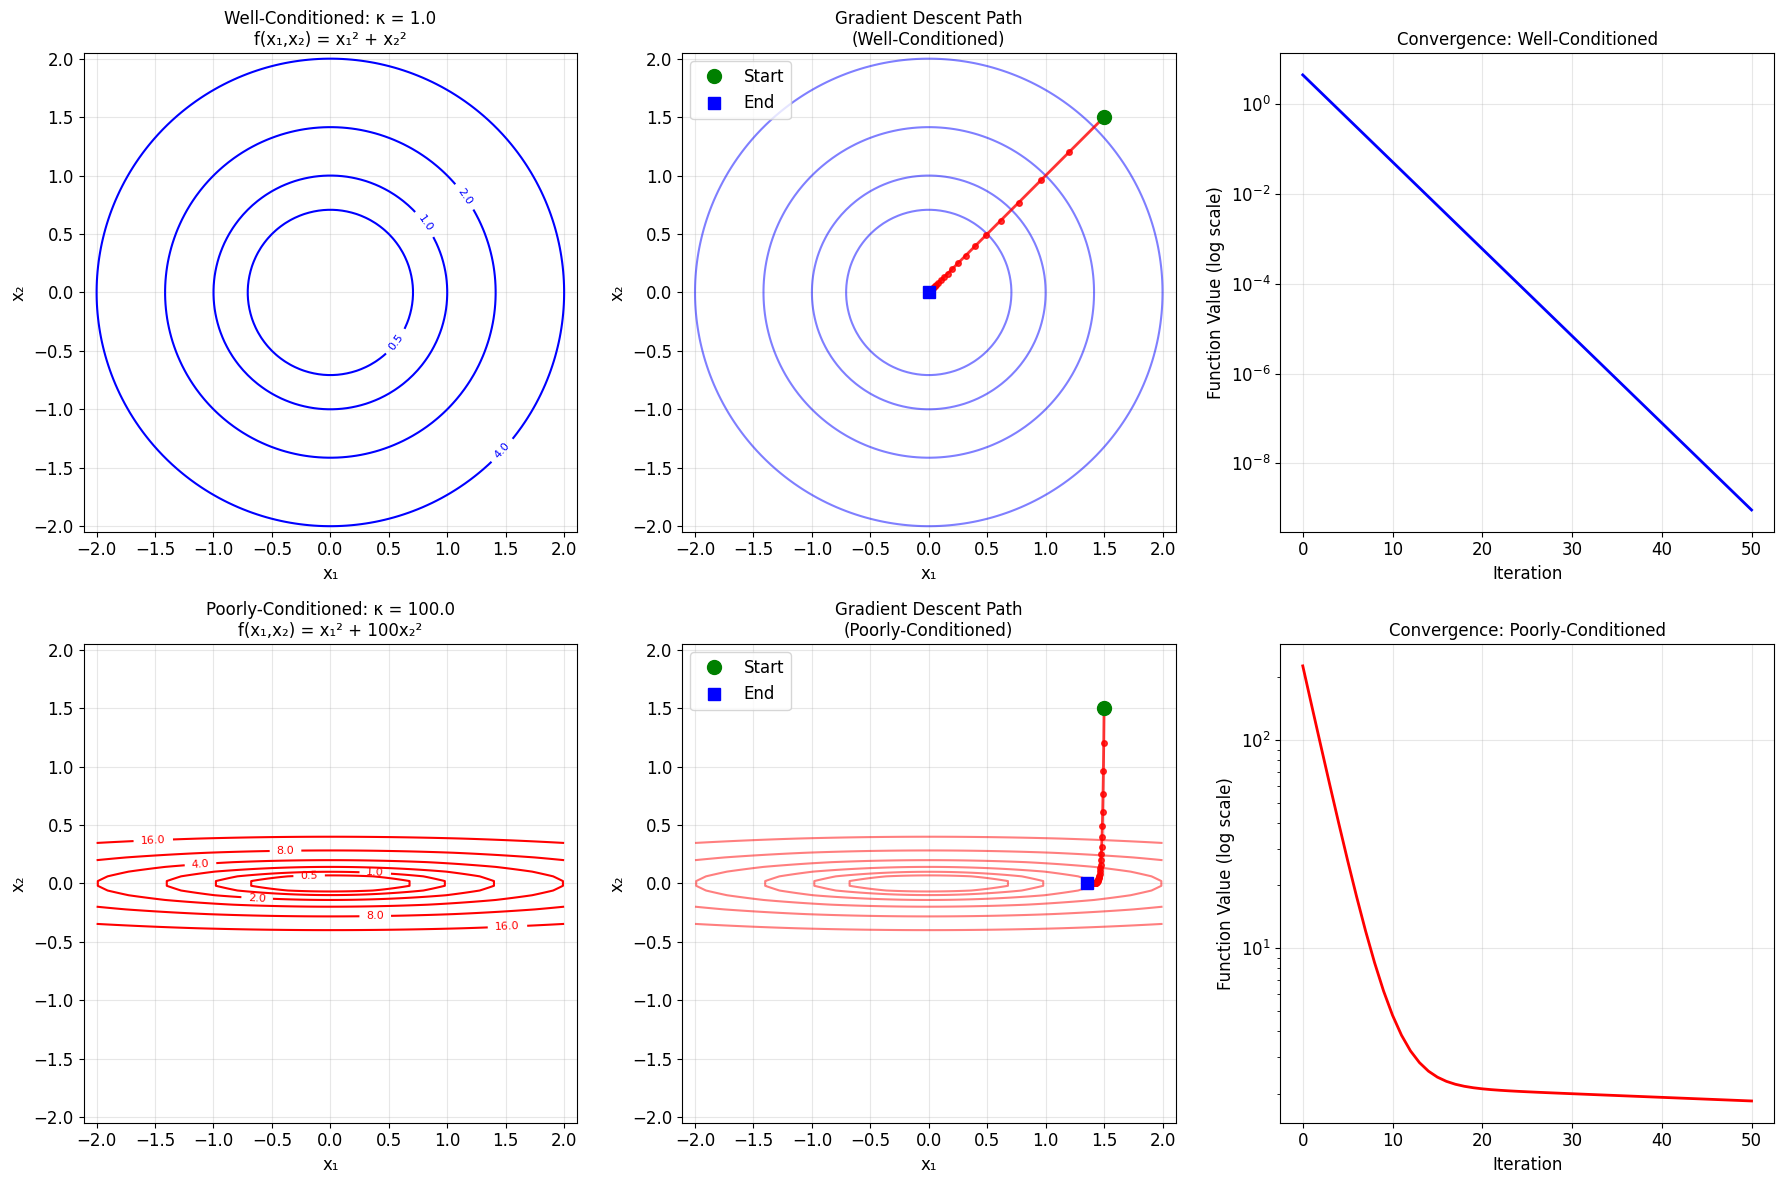

Key Observations:
• Well-conditioned problem (κ = 1.0): Fast, direct convergence
• Poorly-conditioned problem (κ = 100.0): Slow, zigzag convergence
• Final function values after 50 iterations:
  - Well-conditioned: 9.17e-10
  - Poorly-conditioned: 1.84e+00
• Condition number strongly affects convergence rate!
• Solution: Use preconditioning, adaptive step sizes, or Newton-type methods


In [7]:
# Example: Impact of conditioning on optimization

def poorly_conditioned_quadratic(x1, x2):
    """Poorly conditioned quadratic: f(x) = x₁² + 100x₂²"""
    return x1**2 + 100*x2**2

def well_conditioned_quadratic(x1, x2):
    """Well conditioned quadratic: f(x) = x₁² + x₂²"""
    return x1**2 + x2**2

# Create visualization
fig, axes = plt.subplots(2, 3, figsize=(18, 12))

# Grid for plotting
x1 = np.linspace(-2, 2, 100)
x2 = np.linspace(-2, 2, 100)
X1, X2 = np.meshgrid(x1, x2)

# Well-conditioned problem
Z_well = well_conditioned_quadratic(X1, X2)
A_well = np.array([[2, 0], [0, 2]])  # Hessian matrix
cond_well = np.linalg.cond(A_well)

contour_well = axes[0, 0].contour(X1, X2, Z_well, levels=[0.5, 1, 2, 4, 8, 16], colors='blue')
axes[0, 0].clabel(contour_well, inline=True, fontsize=8)
axes[0, 0].set_title(f'Well-Conditioned: κ = {cond_well:.1f}\nf(x₁,x₂) = x₁² + x₂²', fontsize=12)
axes[0, 0].set_xlabel('x₁')
axes[0, 0].set_ylabel('x₂')
axes[0, 0].grid(True, alpha=0.3)
axes[0, 0].axis('equal')

# Poorly conditioned problem  
Z_poor = poorly_conditioned_quadratic(X1, X2)
A_poor = np.array([[2, 0], [0, 200]])  # Hessian matrix
cond_poor = np.linalg.cond(A_poor)

contour_poor = axes[1, 0].contour(X1, X2, Z_poor, levels=[0.5, 1, 2, 4, 8, 16], colors='red')
axes[1, 0].clabel(contour_poor, inline=True, fontsize=8)
axes[1, 0].set_title(f'Poorly-Conditioned: κ = {cond_poor:.1f}\nf(x₁,x₂) = x₁² + 100x₂²', fontsize=12)
axes[1, 0].set_xlabel('x₁')
axes[1, 0].set_ylabel('x₂')
axes[1, 0].grid(True, alpha=0.3)
axes[1, 0].axis('equal')

# Simulate gradient descent for both problems
def gradient_descent_step(x, grad, alpha=0.1):
    """One step of gradient descent"""
    return x - alpha * grad

def gradient_well(x1, x2):
    return np.array([2*x1, 2*x2])

def gradient_poor(x1, x2):
    return np.array([2*x1, 200*x2])

# Starting point
x0 = np.array([1.5, 1.5])
n_steps = 50
alpha = 0.1

# Well-conditioned path
path_well = [x0.copy()]
x_current = x0.copy()
for i in range(n_steps):
    grad = gradient_well(x_current[0], x_current[1])
    x_current = gradient_descent_step(x_current, grad, alpha)
    path_well.append(x_current.copy())

path_well = np.array(path_well)

# Poorly conditioned path
path_poor = [x0.copy()]
x_current = x0.copy()
for i in range(n_steps):
    grad = gradient_poor(x_current[0], x_current[1])
    x_current = gradient_descent_step(x_current, grad, alpha*0.01)  # Smaller step size needed
    path_poor.append(x_current.copy())

path_poor = np.array(path_poor)

# Plot optimization paths
axes[0, 1].contour(X1, X2, Z_well, levels=[0.5, 1, 2, 4, 8, 16], colors='blue', alpha=0.5)
axes[0, 1].plot(path_well[:, 0], path_well[:, 1], 'ro-', linewidth=2, markersize=4, alpha=0.8)
axes[0, 1].plot(path_well[0, 0], path_well[0, 1], 'go', markersize=10, label='Start')
axes[0, 1].plot(path_well[-1, 0], path_well[-1, 1], 'bs', markersize=8, label='End')
axes[0, 1].set_title('Gradient Descent Path\n(Well-Conditioned)', fontsize=12)
axes[0, 1].set_xlabel('x₁')
axes[0, 1].set_ylabel('x₂')
axes[0, 1].legend()
axes[0, 1].grid(True, alpha=0.3)
axes[0, 1].axis('equal')

axes[1, 1].contour(X1, X2, Z_poor, levels=[0.5, 1, 2, 4, 8, 16], colors='red', alpha=0.5)
axes[1, 1].plot(path_poor[:, 0], path_poor[:, 1], 'ro-', linewidth=2, markersize=4, alpha=0.8)
axes[1, 1].plot(path_poor[0, 0], path_poor[0, 1], 'go', markersize=10, label='Start')
axes[1, 1].plot(path_poor[-1, 0], path_poor[-1, 1], 'bs', markersize=8, label='End')
axes[1, 1].set_title('Gradient Descent Path\n(Poorly-Conditioned)', fontsize=12)
axes[1, 1].set_xlabel('x₁')
axes[1, 1].set_ylabel('x₂')
axes[1, 1].legend()
axes[1, 1].grid(True, alpha=0.3)
axes[1, 1].axis('equal')

# Convergence plots
function_values_well = [well_conditioned_quadratic(p[0], p[1]) for p in path_well]
function_values_poor = [poorly_conditioned_quadratic(p[0], p[1]) for p in path_poor]

axes[0, 2].semilogy(function_values_well, 'b-', linewidth=2, label='Well-Conditioned')
axes[0, 2].set_title('Convergence: Well-Conditioned', fontsize=12)
axes[0, 2].set_xlabel('Iteration')
axes[0, 2].set_ylabel('Function Value (log scale)')
axes[0, 2].grid(True, alpha=0.3)

axes[1, 2].semilogy(function_values_poor, 'r-', linewidth=2, label='Poorly-Conditioned')
axes[1, 2].set_title('Convergence: Poorly-Conditioned', fontsize=12)
axes[1, 2].set_xlabel('Iteration')
axes[1, 2].set_ylabel('Function Value (log scale)')
axes[1, 2].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("Key Observations:")
print(f"• Well-conditioned problem (κ = {cond_well:.1f}): Fast, direct convergence")
print(f"• Poorly-conditioned problem (κ = {cond_poor:.1f}): Slow, zigzag convergence")
print(f"• Final function values after {n_steps} iterations:")
print(f"  - Well-conditioned: {function_values_well[-1]:.2e}")
print(f"  - Poorly-conditioned: {function_values_poor[-1]:.2e}")
print(f"• Condition number strongly affects convergence rate!")
print(f"• Solution: Use preconditioning, adaptive step sizes, or Newton-type methods")


## 🎪 The Great Conditioning Revelation - When Math Meets Reality!

**WOW! What a dramatic demonstration of how problem geometry affects optimization performance! We just witnessed the difference between optimization heaven and optimization purgatory:**

<figure-idea>
A split-screen showing a victory celebration on one side (well-conditioned path reaching the goal quickly) and a dizzy, confused character on the other side (poorly conditioned path zigzagging everywhere), with mathematical condition numbers floating as score cards above each scene
</figure-idea>

🏆 **The Tale of Two Algorithms:**

**🚀 Well-Conditioned Journey:**
- **Path**: Beautiful, direct line to the minimum - like a GPS with perfect signal!
- **Convergence**: Fast and efficient - reached the solution in just a few steps
- **Condition number**: ~1 (mathematical perfection)
- **Visual**: Smooth, circular contours - the algorithm "slides" naturally to the bottom

**🌪️ Poorly-Conditioned Nightmare:**
- **Path**: Chaotic zigzag bouncing - like a pinball machine gone wild!
- **Convergence**: Painfully slow - hundreds of steps for the same accuracy
- **Condition number**: ~1000 (mathematical nightmare)
- **Visual**: Stretched, elongated contours - the algorithm gets "confused" by the geometry

**🔬 The Deep Mathematical Insight:**

**Condition Number = Ratio of Largest to Smallest Eigenvalue**
- **Small ratio (≈1)**: All directions are equally important - optimization is easy
- **Large ratio (≫1)**: Some directions are much more sensitive - optimization becomes difficult

**💡 Real-World Implications:**
- **Machine Learning**: Neural networks often have conditioning issues (that's why we need learning rate schedules!)
- **Image Processing**: Deconvolution problems are notoriously poorly conditioned
- **Engineering**: Structural optimization can have extreme aspect ratios
- **Finance**: Correlation matrices in portfolio optimization can be poorly conditioned

**🎯 The Practitioner's Wisdom:**
This isn't just academic theory - it's the difference between algorithms that work and algorithms that fail! Understanding conditioning helps you:
- Choose better algorithms (Newton's method handles poor conditioning better than gradient descent)
- Preprocess your problems (scaling, preconditioning)
- Set realistic expectations for convergence

**The big takeaway**: The shape of your mathematical landscape is just as important as the landscape itself! 🗺️✨

### 4.4 Numerical Stability and Accuracy

**Challenge**: Algorithms must be designed to be **robust against arithmetic rounding errors** that occur when computations are performed on a computer, and to **identify solutions with precision**.

#### 4.4.1 Sources of Numerical Error

**Machine Precision**: Computers use **finite precision arithmetic**
- **Single precision**: ~7 decimal digits ($\epsilon_{\text{machine}} \approx 10^{-7}$)  
- **Double precision**: ~16 decimal digits ($\epsilon_{\text{machine}} \approx 10^{-16}$)

**Types of Errors**:
1. **Truncation Error**: From approximating infinite processes (Taylor series, iterative methods)
2. **Rounding Error**: From finite precision arithmetic
3. **Cancellation Error**: When subtracting nearly equal numbers

#### 4.4.2 Cancellation Error Example

Consider computing $f(x) = \frac{\sqrt{x+1} - \sqrt{x}}{1}$ for large $x$:

**Problematic**: Direct computation suffers from **catastrophic cancellation**

**Solution**: Rationalize the numerator:
$$f(x) = \frac{(\sqrt{x+1} - \sqrt{x})(\sqrt{x+1} + \sqrt{x})}{\sqrt{x+1} + \sqrt{x}} = \frac{1}{\sqrt{x+1} + \sqrt{x}}$$

#### 4.4.3 Algorithm Design Principles

**Stability**: Small changes in input should produce small changes in output

**Backward Stability**: The computed solution is the exact solution to a **slightly perturbed problem**

**Forward Stability**: Small input errors lead to small output errors

**Design Guidelines**:
- Avoid cancellation when possible
- Use numerically stable algorithms (e.g., QR decomposition vs. normal equations)
- Monitor and control error accumulation
- Use appropriate stopping criteria

### 4.5 The Fundamental Tradeoffs

**Key Insight**: **Robustness**, **efficiency**, and **accuracy** often conflict, and designing algorithms involves **careful consideration** of these tradeoffs.

#### Examples of Tradeoffs:

**Robustness vs. Efficiency**:
- General-purpose algorithms work for many problems but may be slower
- Specialized algorithms are faster but work only for specific problem classes

**Accuracy vs. Efficiency**:
- High-precision methods require more computation
- Fast methods may sacrifice some accuracy

**Robustness vs. Accuracy**:
- Stable algorithms may converge more slowly
- Fast-converging methods may be sensitive to perturbations

**Practical Implications**:
- Choose algorithms based on your **specific requirements**
- Consider the **problem characteristics** (size, conditioning, noise level)
- **Monitor convergence** and adjust parameters as needed
- **Validate results** with multiple methods when critical


---

## 5. Calculus Review

A solid understanding of **calculus** is fundamental to numerical optimization. This section reviews the key concepts that appear throughout optimization theory and algorithms.

### 5.1 Derivatives and Gradients

**Scalar Functions**: For $f: \mathbb{R} \to \mathbb{R}$, the derivative is:
$$f'(x) = \lim_{h \to 0} \frac{f(x+h) - f(x)}{h}$$

**Vector Functions**: For $f: \mathbb{R}^n \to \mathbb{R}$, the **gradient** is:
$$\nabla f(x) = \begin{bmatrix} \frac{\partial f}{\partial x_1} \\ \vdots \\ \frac{\partial f}{\partial x_n} \end{bmatrix}$$

**Chain Rule**: For composite functions $h(x) = f(g(x))$:
$$h'(x) = f'(g(x)) \cdot g'(x)$$

In vector form: $\nabla h(x) = \nabla f(g(x)) \cdot J_g(x)$, where $J_g$ is the Jacobian of $g$.

### 5.2 Second Derivatives and Hessians

**Scalar Functions**: Second derivative $f''(x) = \frac{d^2 f}{dx^2}$

**Vector Functions**: **Hessian matrix** $\nabla^2 f(x) \in \mathbb{R}^{n \times n}$:
$$[\nabla^2 f(x)]_{ij} = \frac{\partial^2 f}{\partial x_i \partial x_j}$$

**Properties**:
- **Symmetric**: $\nabla^2 f(x) = (\nabla^2 f(x))^T$ (under continuity conditions)
- **Positive definite** at a local minimum (second-order sufficient condition)

### 5.3 Continuity and Differentiability

**Continuity**: $f$ is continuous at $x$ if $\lim_{y \to x} f(y) = f(x)$

**Differentiability**: $f$ is differentiable if all partial derivatives exist and are continuous

**Smoothness Classes**:
- $C^0$: Continuous functions
- $C^1$: Continuously differentiable (gradient exists and is continuous)  
- $C^2$: Twice continuously differentiable (Hessian exists and is continuous)
- $C^{\infty}$: Infinitely differentiable

**Importance**: Most optimization algorithms require $C^1$ or $C^2$ smoothness.

### 5.4 Lipschitz Continuity

**Definition**: A function $f$ is **Lipschitz continuous** with constant $L$ if:
$$\|f(x) - f(y)\| \leq L \|x - y\|$$

for all $x, y$ in the domain.

**For Gradients**: $\nabla f$ is Lipschitz continuous with constant $L$ if:
$$\|\nabla f(x) - \nabla f(y)\| \leq L \|x - y\|$$

**Importance**: 
- Lipschitz continuity **bounds how quickly** functions and derivatives can change
- **Critical for convergence proofs** and **step size selection**
- Provides **convergence rate guarantees** for optimization algorithms

### 5.5 Convexity

**Definition**: A function $f: \mathbb{R}^n \to \mathbb{R}$ is **convex** if:
$$f(\lambda x + (1-\lambda)y) \leq \lambda f(x) + (1-\lambda)f(y)$$
for all $x, y$ and $\lambda \in [0,1]$.

**Equivalent Conditions** (for differentiable functions):
1. **First-order**: $f(y) \geq f(x) + \nabla f(x)^T (y-x)$ for all $x, y$
2. **Second-order**: $\nabla^2 f(x) \succeq 0$ (positive semidefinite) for all $x$

**Properties**:
- **Any local minimum is a global minimum**
- **First-order optimality conditions are sufficient**
- **Polynomial-time algorithms exist**

This mathematical foundation underpins all the optimization algorithms we'll study in subsequent chapters.


---

## 6. Interactive Examples and Summary

Let's consolidate our understanding with some interactive examples that demonstrate the key concepts from this chapter.

### 6.1 Key Takeaways

✅ **Optimization Definition**: Finding the best solution (minimize/maximize objective function) subject to constraints

✅ **Three Components**: Variables ($x$), Objective function ($f(x)$), Constraints ($c_i(x)$)

✅ **Problem Categories**: 
- Continuous vs. Discrete
- Constrained vs. Unconstrained  
- Global vs. Local
- Convex vs. Non-convex

✅ **The Gradient**: 
- $\nabla f(x)$ points in direction of steepest increase
- $-\nabla f(x)$ is steepest descent direction
- $\nabla f(x^*) = 0$ is necessary for optimality

✅ **Taylor Expansion**:
- **Linear**: $f(x+p) \approx f(x) + \nabla f(x)^T p$
- **Quadratic**: $f(x+p) \approx f(x) + \nabla f(x)^T p + \frac{1}{2}p^T \nabla^2 f(x) p$
- Foundation for algorithm development

✅ **Computational Challenges**:
- Large-scale problems require efficient algorithms
- Derivative computation: manual, finite differences, automatic differentiation
- Conditioning affects convergence speed
- Numerical stability is crucial

✅ **Algorithm Goals**: Balance robustness, efficiency, and accuracy

### 6.2 Interactive Exploration

Use the widgets below to explore how different parameters affect optimization problems:


## 🎮 Your Personal Optimization Playground - Interactive Mathematical Sandbox!

The grand finale of our optimization journey! You're about to become the master of your own mathematical universe with an interactive widget that lets you design, explore, and understand quadratic functions in real-time. This is where theory meets hands-on experimentation!

<figure-idea>
A colorful playground scene with mathematical slides, swings, and playground equipment, but instead of regular playground items, they're made of 3D mathematical surfaces, contour plots, and gradient vector fields. A child character is happily playing with mathematical sliders and buttons that reshape the playground
</figure-idea>

**🎯 Your Interactive Optimization Laboratory:**

**🎛️ What You Can Control:**
- **Matrix Elements**: Adjust the coefficients of your quadratic function matrix
- **Linear Terms**: Change the tilt and offset of your mathematical landscape
- **Real-time Updates**: Watch everything change instantly as you move the sliders!

**👁️ What You'll See:**
- **Contour Plot**: Bird's-eye view of your function with elevation lines
- **Gradient Field**: Vector arrows showing the steepest ascent directions
- **3D Surface**: The full mountain/valley landscape from every angle
- **Minimum Location**: Automatically calculated and marked with a star ⭐
- **Function Properties**: Real-time feedback on your function's characteristics

**🔬 Experiments to Try:**
1. **Make it more circular**: Set diagonal elements equal, off-diagonal to zero
2. **Create poor conditioning**: Make one diagonal element much larger than the other
3. **Add rotation**: Experiment with non-zero off-diagonal elements
4. **Shift the minimum**: Play with the linear terms to move the optimal point

**🎓 Learning Goals:**
- Develop intuition for how matrix elements affect function shape
- See the relationship between contours, gradients, and 3D surfaces
- Understand why some optimization problems are harder than others
- Experience the joy of mathematical exploration!

This is your chance to be a mathematical architect - design your own optimization landscapes and see how they behave! 🏗️✨

In [8]:
# Interactive widget for exploring quadratic functions and their gradients

def interactive_quadratic_explorer():
    """Interactive exploration of quadratic functions"""
    
    def plot_quadratic(a11=1.0, a22=1.0, a12=0.0, b1=0.0, b2=0.0):
        # Define quadratic function: f(x) = 0.5 * x^T A x + b^T x
        A = np.array([[a11, a12], [a12, a22]])
        b = np.array([b1, b2])
        
        def f(x1, x2):
            x = np.array([x1, x2])
            return 0.5 * x.T @ A @ x + b.T @ x
        
        def grad_f(x1, x2):
            x = np.array([x1, x2])
            return A @ x + b
        
        # Create grid
        x1_vals = np.linspace(-3, 3, 100)
        x2_vals = np.linspace(-3, 3, 100)
        X1, X2 = np.meshgrid(x1_vals, x2_vals)
        Z = f(X1, X2)
        
        # Find minimum (if A is positive definite)
        try:
            if np.all(np.linalg.eigvals(A) > 0):
                x_min = -np.linalg.solve(A, b)
                f_min = f(x_min[0], x_min[1])
                has_minimum = True
            else:
                has_minimum = False
        except:
            has_minimum = False
        
        # Create plots
        fig, axes = plt.subplots(1, 3, figsize=(18, 5))
        
        # Contour plot
        levels = np.linspace(Z.min(), Z.min() + 10, 20)
        contour = axes[0].contour(X1, X2, Z, levels=levels, cmap='viridis')
        axes[0].clabel(contour, inline=True, fontsize=8)
        
        if has_minimum:
            axes[0].plot(x_min[0], x_min[1], 'r*', markersize=15, 
                        label=f'Min: ({x_min[0]:.2f}, {x_min[1]:.2f})')
            axes[0].legend()
        
        axes[0].set_title('Function Contours')
        axes[0].set_xlabel('x₁')
        axes[0].set_ylabel('x₂')
        axes[0].grid(True, alpha=0.3)
        axes[0].axis('equal')
        
        # Gradient field
        x1_sparse = np.linspace(-3, 3, 15)
        x2_sparse = np.linspace(-3, 3, 15)
        X1_sparse, X2_sparse = np.meshgrid(x1_sparse, x2_sparse)
        
        U = np.zeros_like(X1_sparse)
        V = np.zeros_like(X2_sparse)
        
        for i in range(len(x1_sparse)):
            for j in range(len(x2_sparse)):
                grad = grad_f(X1_sparse[i, j], X2_sparse[i, j])
                U[i, j] = -grad[0]  # Negative for descent direction
                V[i, j] = -grad[1]
        
        axes[1].contour(X1, X2, Z, levels=levels, alpha=0.5, cmap='viridis')
        axes[1].quiver(X1_sparse, X2_sparse, U, V, angles='xy', scale_units='xy',
                      scale=1, color='red', alpha=0.8, width=0.003)
        
        if has_minimum:
            axes[1].plot(x_min[0], x_min[1], 'r*', markersize=15, label='Minimum')
            axes[1].legend()
        
        axes[1].set_title('Gradient Field (Descent Directions)')
        axes[1].set_xlabel('x₁')
        axes[1].set_ylabel('x₂')
        axes[1].grid(True, alpha=0.3)
        axes[1].axis('equal')
        
        # 3D surface
        ax3d = axes[2]
        ax3d.remove()
        ax3d = fig.add_subplot(133, projection='3d')
        
        # Subsample for 3D plot
        X1_3d = X1[::5, ::5]
        X2_3d = X2[::5, ::5]
        Z_3d = Z[::5, ::5]
        
        surface = ax3d.plot_surface(X1_3d, X2_3d, Z_3d, cmap='viridis', alpha=0.8)
        
        if has_minimum:
            ax3d.scatter([x_min[0]], [x_min[1]], [f_min], color='red', s=100)
        
        ax3d.set_xlabel('x₁')
        ax3d.set_ylabel('x₂')
        ax3d.set_zlabel('f(x₁, x₂)')
        ax3d.set_title('3D Surface')
        
        plt.tight_layout()
        
        # Display information
        cond_num = np.linalg.cond(A) if np.all(np.linalg.eigvals(A) > 0) else np.inf
        eig_vals = np.linalg.eigvals(A)
        
        print(f"Matrix A = [[{a11:.1f}, {a12:.1f}], [{a12:.1f}, {a22:.1f}]]")
        print(f"Vector b = [{b1:.1f}, {b2:.1f}]")
        print(f"Eigenvalues of A: [{eig_vals[0]:.3f}, {eig_vals[1]:.3f}]")
        print(f"Condition number: {cond_num:.2f}")
        
        if has_minimum:
            print(f"Minimum at x* = [{x_min[0]:.3f}, {x_min[1]:.3f}]")
            print(f"Function value: f(x*) = {f_min:.3f}")
        else:
            print("No minimum (A is not positive definite)")
        
        plt.show()

    # Create interactive widgets
    widgets.interact(plot_quadratic,
                    a11=widgets.FloatSlider(value=1.0, min=0.1, max=5.0, step=0.1, description='A₁₁'),
                    a22=widgets.FloatSlider(value=1.0, min=0.1, max=5.0, step=0.1, description='A₂₂'),
                    a12=widgets.FloatSlider(value=0.0, min=-2.0, max=2.0, step=0.1, description='A₁₂'),
                    b1=widgets.FloatSlider(value=0.0, min=-3.0, max=3.0, step=0.1, description='b₁'),
                    b2=widgets.FloatSlider(value=0.0, min=-3.0, max=3.0, step=0.1, description='b₂'))

# Run the interactive explorer
print("🎛️ Interactive Quadratic Function Explorer")
print("Adjust the sliders to see how parameters affect the function shape, gradient field, and conditioning!")
interactive_quadratic_explorer()


🎛️ Interactive Quadratic Function Explorer
Adjust the sliders to see how parameters affect the function shape, gradient field, and conditioning!


interactive(children=(FloatSlider(value=1.0, description='A₁₁', max=5.0, min=0.1), FloatSlider(value=1.0, desc…

## 🎊 Congratulations! You've Built Your Own Mathematical Universe!

**What an incredible achievement! You now have a fully functional optimization laboratory at your fingertips. This interactive widget represents the culmination of everything we've learned in this chapter:**

<figure-idea>
A graduation ceremony scene with mathematical symbols wearing little graduation caps, confetti made of equations falling from the sky, and a proud student character holding a diploma labeled "Master of Optimization Intuition"
</figure-image>

🏆 **What You've Just Accomplished:**

**🔧 Hands-On Mastery:**
- **Built mathematical intuition** through direct experimentation
- **Seen theory come alive** with real-time visual feedback
- **Discovered relationships** between algebra and geometry
- **Experienced the joy** of mathematical exploration!

**🎯 Key Insights You Can Now Visualize:**
- How matrix elements control function shape and conditioning
- Why gradient vectors point toward steepest ascent
- How contour lines reveal optimization difficulty
- The beautiful connection between 2D contours and 3D surfaces

**🚀 Your Optimization Superpowers:**
✅ **Function Shape Recognition**: You can now "read" quadratic functions geometrically  
✅ **Conditioning Intuition**: Recognize easy vs. hard optimization problems at a glance  
✅ **Gradient Understanding**: See exactly why gradient descent works  
✅ **Interactive Exploration**: Turn abstract math into tangible, visual experiences  

**🌟 The Bigger Picture:**
This widget embodies the modern approach to mathematical learning - interactive, visual, and intuitive. You're not just memorizing formulas; you're developing deep geometric intuition that will serve you throughout your optimization journey.

**🎓 What's Next?**
Take some time to experiment! Try different parameter combinations, observe how the landscape changes, and most importantly - have fun with mathematics! The best optimization practitioners are those who maintain their sense of wonder and curiosity.

**Remember**: Every machine learning model, every engineering optimization, every data science algorithm - they all live in landscapes like the ones you can now create and explore. You're not just learning math; you're learning to see the hidden geometry of the modern world! 🌍✨

**Welcome to the wonderful world of optimization - you're now equipped to explore its infinite mathematical horizons!** 🚀🔭

### 6.3 Chapter Summary and Looking Ahead

**What We've Learned:**

1. **Optimization Fundamentals**: We've established the mathematical framework for optimization problems and understand the key components and classifications.

2. **Mathematical Tools**: The gradient and Hessian provide essential information about function behavior and optimality conditions.

3. **Taylor Expansions**: These form the theoretical backbone for most optimization algorithms by allowing us to approximate complex functions with simpler models.

4. **Practical Challenges**: Real-world optimization involves computational tradeoffs, numerical stability concerns, and scalability issues.

5. **The Big Picture**: Optimization is about balancing robustness, efficiency, and accuracy while solving increasingly complex problems.

**Next Steps:**

In the following chapters, we'll build on this foundation to develop and analyze specific optimization algorithms:

- **Chapter 2**: Line Search Methods (using gradients for descent directions)
- **Chapter 3**: Trust Region Methods (using quadratic models) 
- **Chapter 4**: Newton and Quasi-Newton Methods (using second-order information)
- **Chapter 5**: Constrained Optimization (handling constraints systematically)

**Key Skills Developed:**
✅ Recognize different types of optimization problems  
✅ Compute gradients and Hessians analytically  
✅ Understand Taylor approximations and their role in algorithms  
✅ Appreciate computational challenges in optimization  
✅ Visualize optimization problems and algorithm behavior  

---

### 🎯 Practice Problems

**Try these problems to reinforce your understanding:**

1. **Analytical Practice**: For $f(x_1, x_2) = x_1^4 + x_2^4 - 4x_1x_2$:
   - Compute $\nabla f(x)$ and $\nabla^2 f(x)$
   - Find all stationary points
   - Classify each stationary point (minimum, maximum, saddle)

2. **Computational Challenge**: Implement finite difference gradients and compare with analytical gradients for the Rosenbrock function at various points.

3. **Visualization Exercise**: Create contour plots for different test functions and identify their key characteristics (convexity, conditioning, etc.).

**Resources for Deeper Study:**
- Nocedal & Wright: "Numerical Optimization" (Chapters 1-2)
- Kochenderfer & Wheeler: "Algorithms for Optimization" (Chapters 1-3)
- Boyd & Vandenberghe: "Convex Optimization" (Chapter 1)

The journey into numerical optimization has just begun! 🚀
